In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def fact(n):
    if(n==0 or n==1):
        return 1
    return n*fact(n-1)

In [3]:
print(fact(1000))

4023872600770937735437024339230039857193748642107146325437999104299385123986290205920442084869694048004799886101971960586316668729948085589013238296699445909974245040870737599188236277271887325197795059509952761208749754624970436014182780946464962910563938874378864873371191810458257836478499770124766328898359557354325131853239584630755574091142624174743493475534286465766116677973966688202912073791438537195882498081268678383745597317461360853795345242215865932019280908782973084313928444032812315586110369768013573042161687476096758713483120254785893207671691324484262361314125087802080002616831510273418279777047846358681701643650241536913982812648102130927612448963599287051149649754199093422215668325720808213331861168115536158365469840467089756029009505376164758477284218896796462449451607653534081989013854424879849599533191017233555566021394503997362807501378376153071277619268490343526252000158885351473316117021039681759215109077880193931781141945452572238655414610628921879602238389714760

In [4]:
count2 = 0
count5 = 0
def count(n):
    c2,c5 = (0,0)
    while(n):
        if(not (n%2==0 or n%5==0)):
            return c2,c5
        else:
            if(n%2==0):
                c2 += 1
                n = n/2
            if(n%5==0):
                c5 += 1
                n = n/5
    return c2,c5

for n in range(2,1001):
    a,b = count(n)
    count2 += a
    count5 += b
print(min([count2,count5]))

249


In [5]:
def e(n):
    e = 0
    for k in range(n):
        e += np.float64(1/fact(k))
    return e

In [6]:
np.e

2.718281828459045

In [7]:
e(81)

2.7182818284590455

In [8]:
def diff(f,x,h):
    return np.float64(f(x+h)-f(x-h))/np.float64(2*h)

In [9]:
def f(x):
    return np.sin(x) * np.log(x)

In [10]:
diff(f,np.pi,.00000001)

-1.1447298788923375

In [11]:
np.cos(np.pi)*np.log(np.pi) + np.sin(np.pi)/np.pi

-1.1447298858494002

In [12]:
def diffDat(X,Y):
    if not len(X) == len(Y):
        return False
    else:
        dy = []
        for i in range(len(X)-1):
            dy.append((Y[i+1]-Y[i])/(X[i+1]-X[i]))
        return np.array(dy)

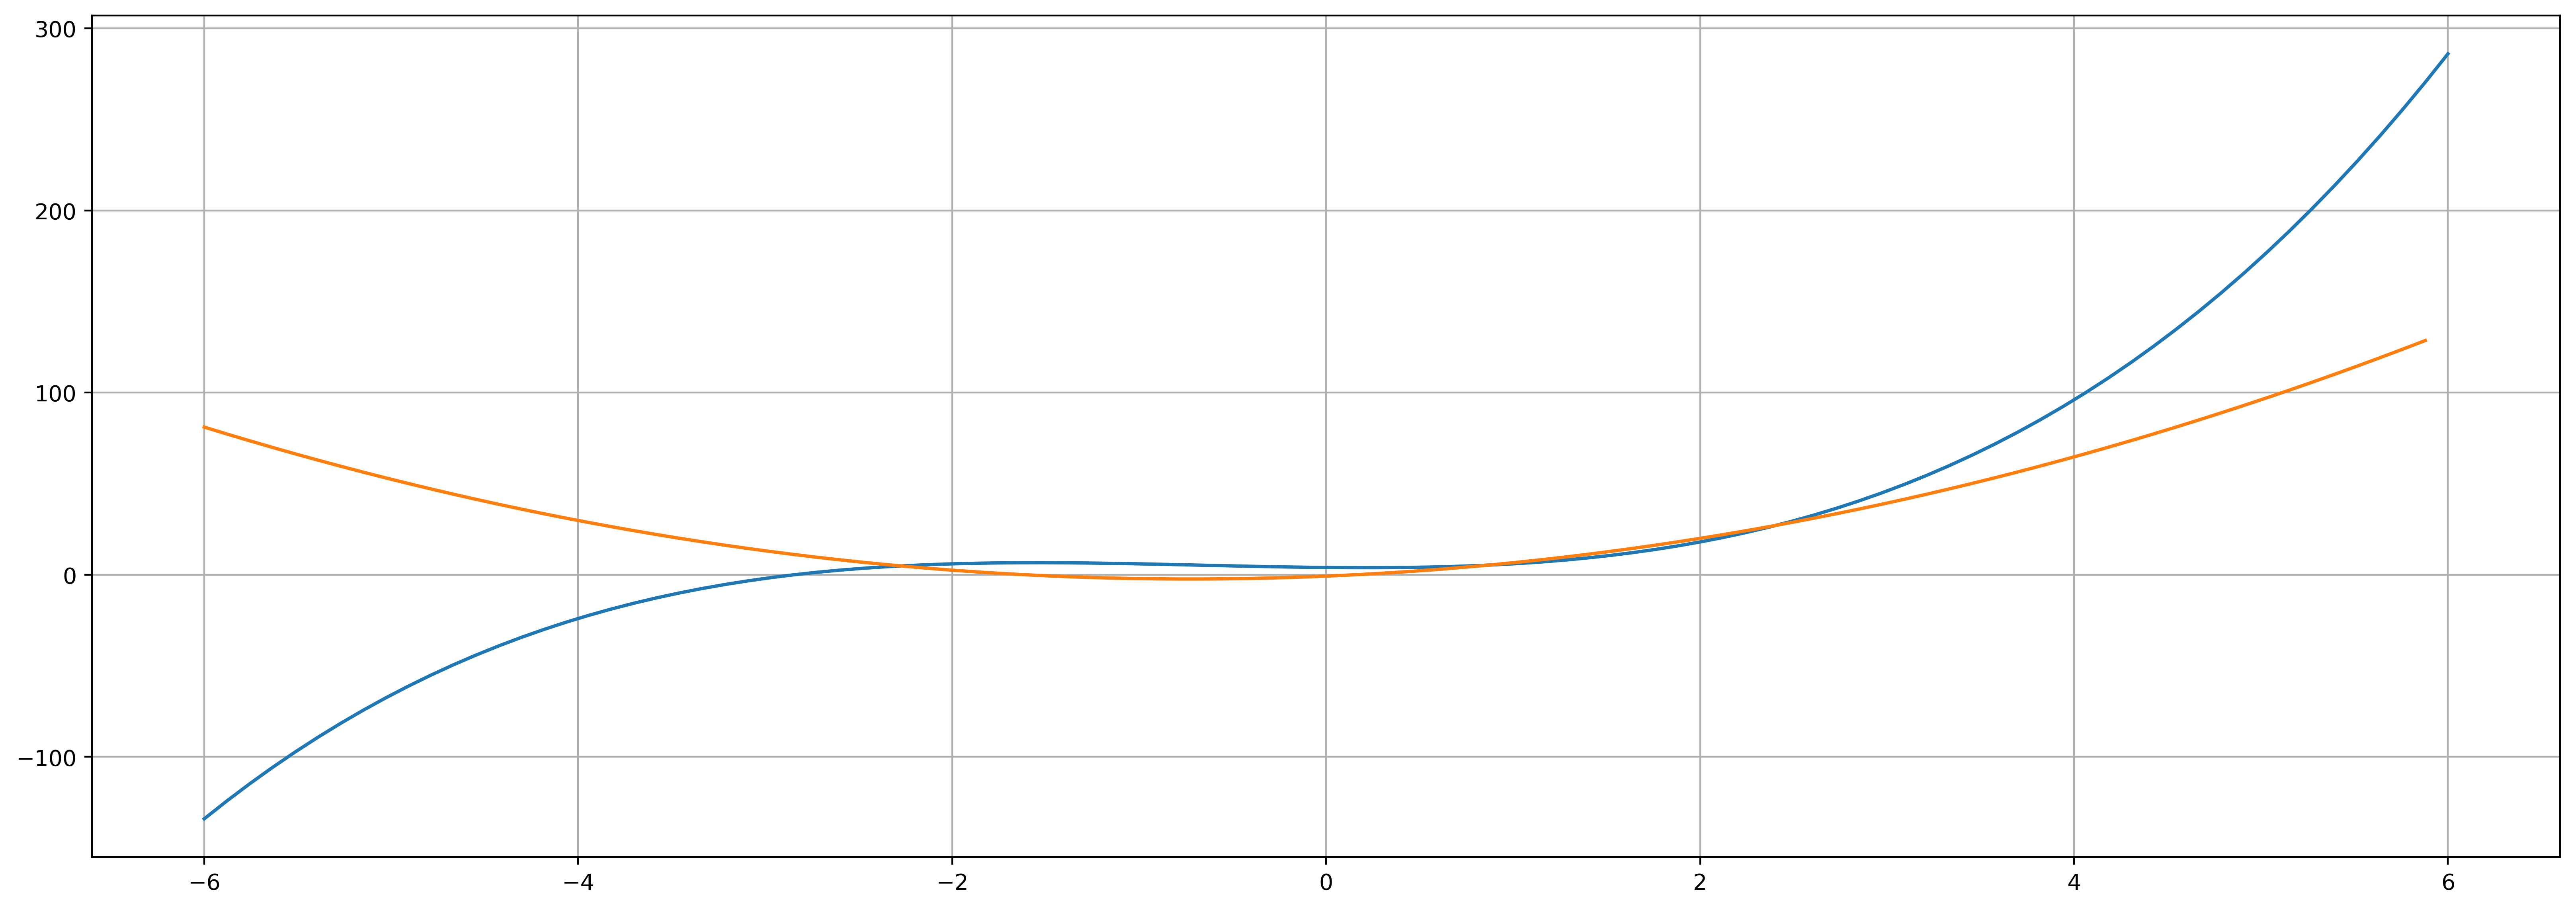

In [13]:
x = np.linspace(-6,6,100)
def G(x):
    return np.power(x,3)+2*x*x-x+4
y = G(x)
DY = diffDat(x,y)
plt.figure(figsize=(20,7),dpi=400)
plt.plot(x,y)
plt.plot(x[:-1],DY)
plt.grid()

In [14]:
def peak(L):
    count = 0
    pL = []
    for k in range(1,len(L)-1):
        if(L[k]>L[k-1] and L[k]>L[k+1]):
            count += 1
            pL.append((L[k],k))
    return (count,pL)

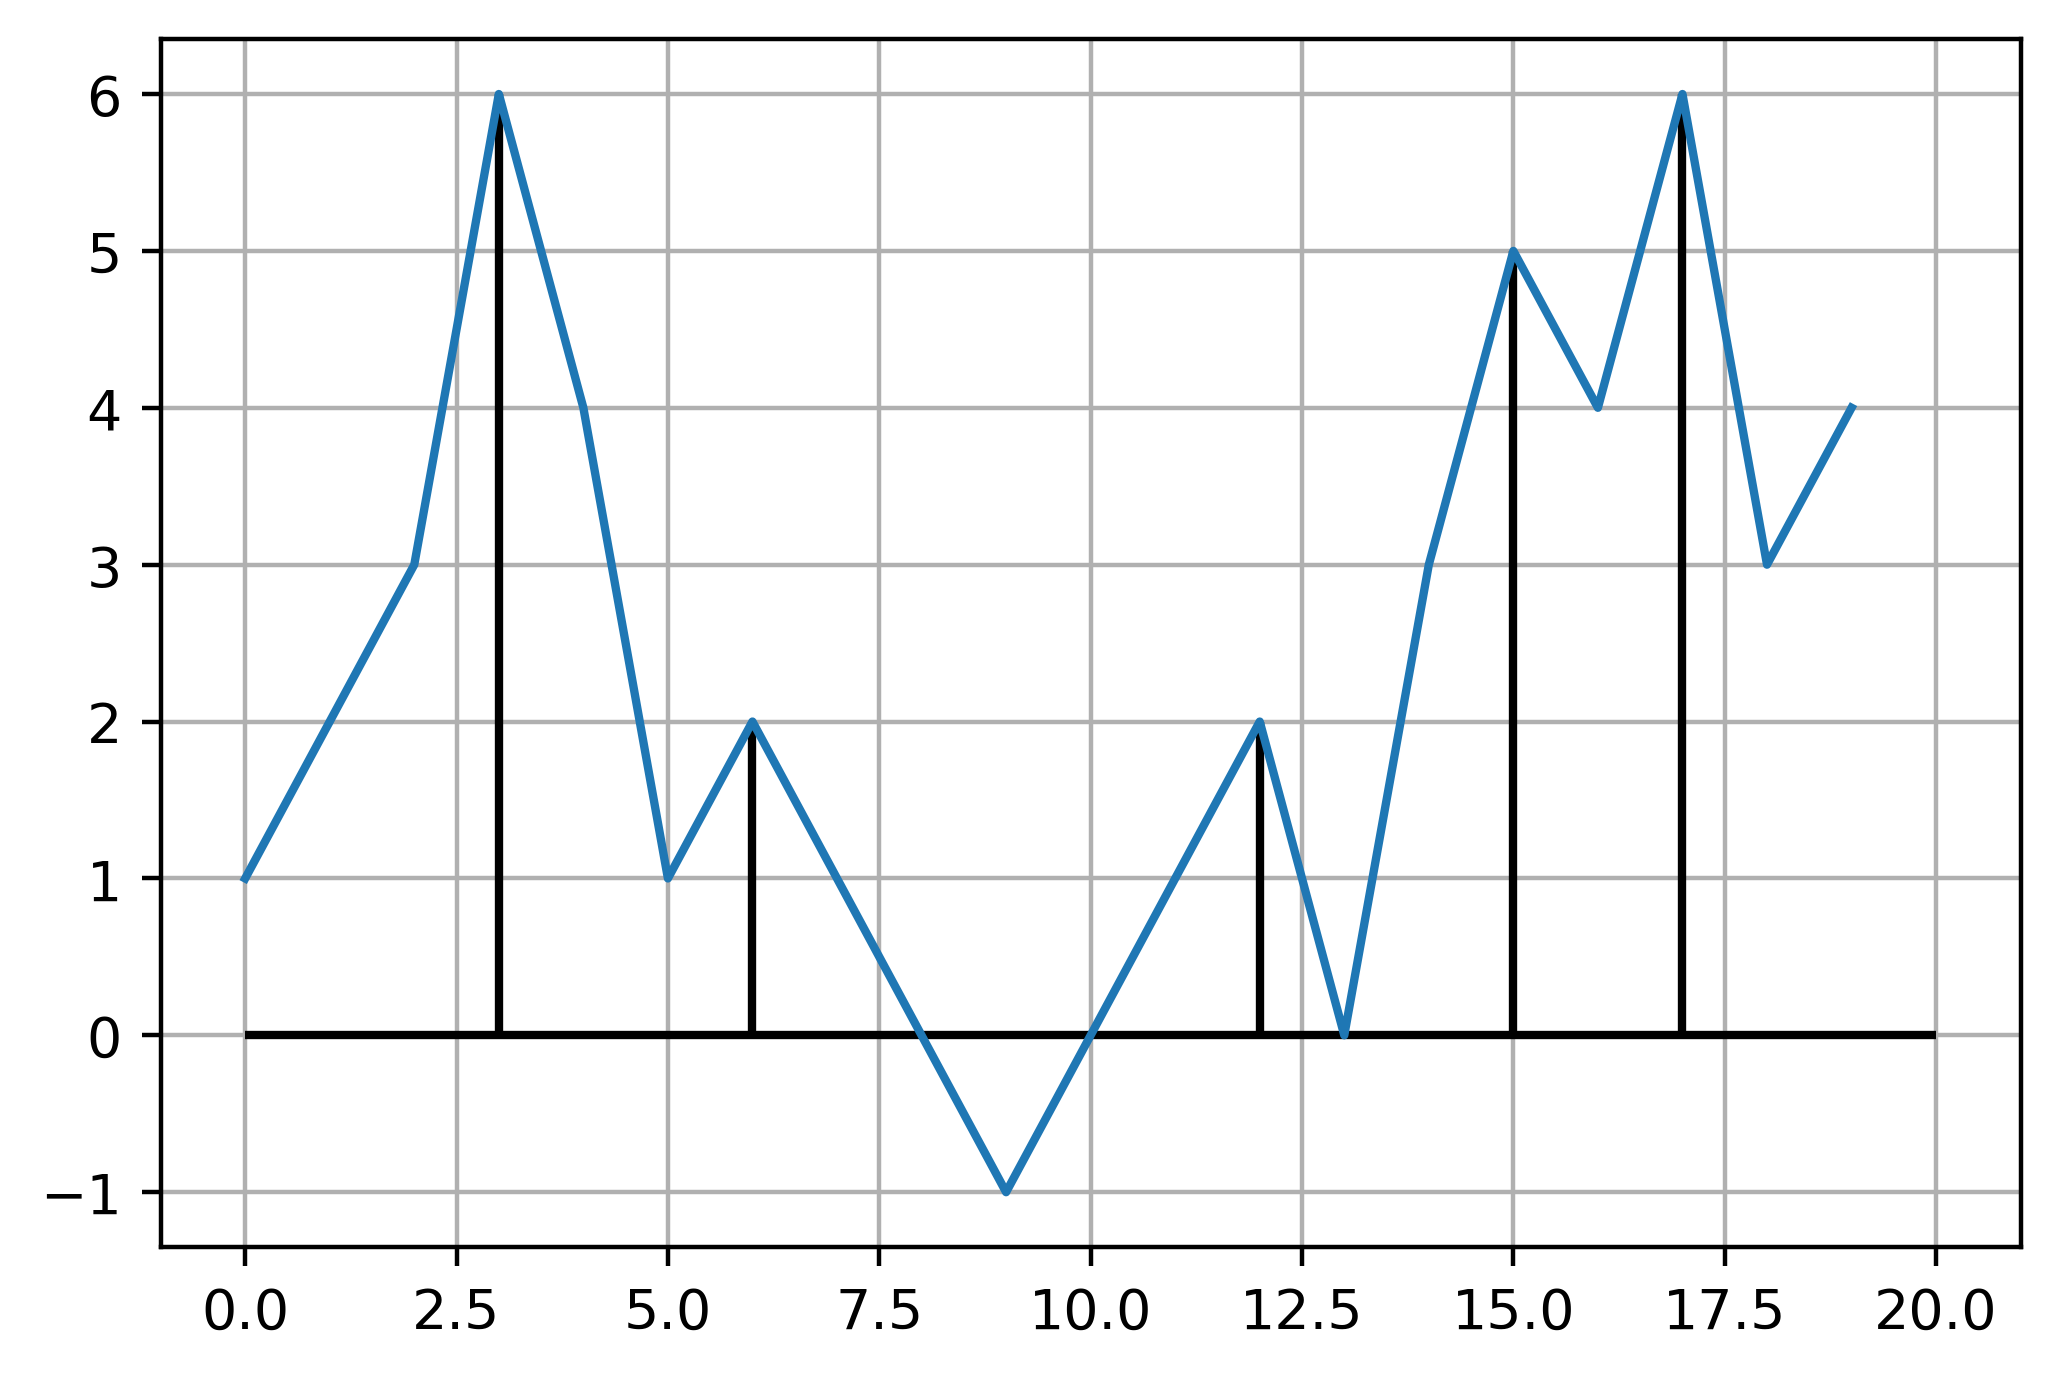

In [15]:
nums = [1,2,3,6,4,1,2,1,0,-1,0,1,2,0,3,5,4,6,3,4]
plt.figure(dpi=400)
plt.plot(nums)
for tup in peak(nums)[1]:
    plt.vlines(tup[1],0,tup[0],'k')
plt.hlines(0,0,len(nums),'k')
plt.grid()

In [16]:
peak(nums)

(5, [(6, 3), (2, 6), (2, 12), (5, 15), (6, 17)])

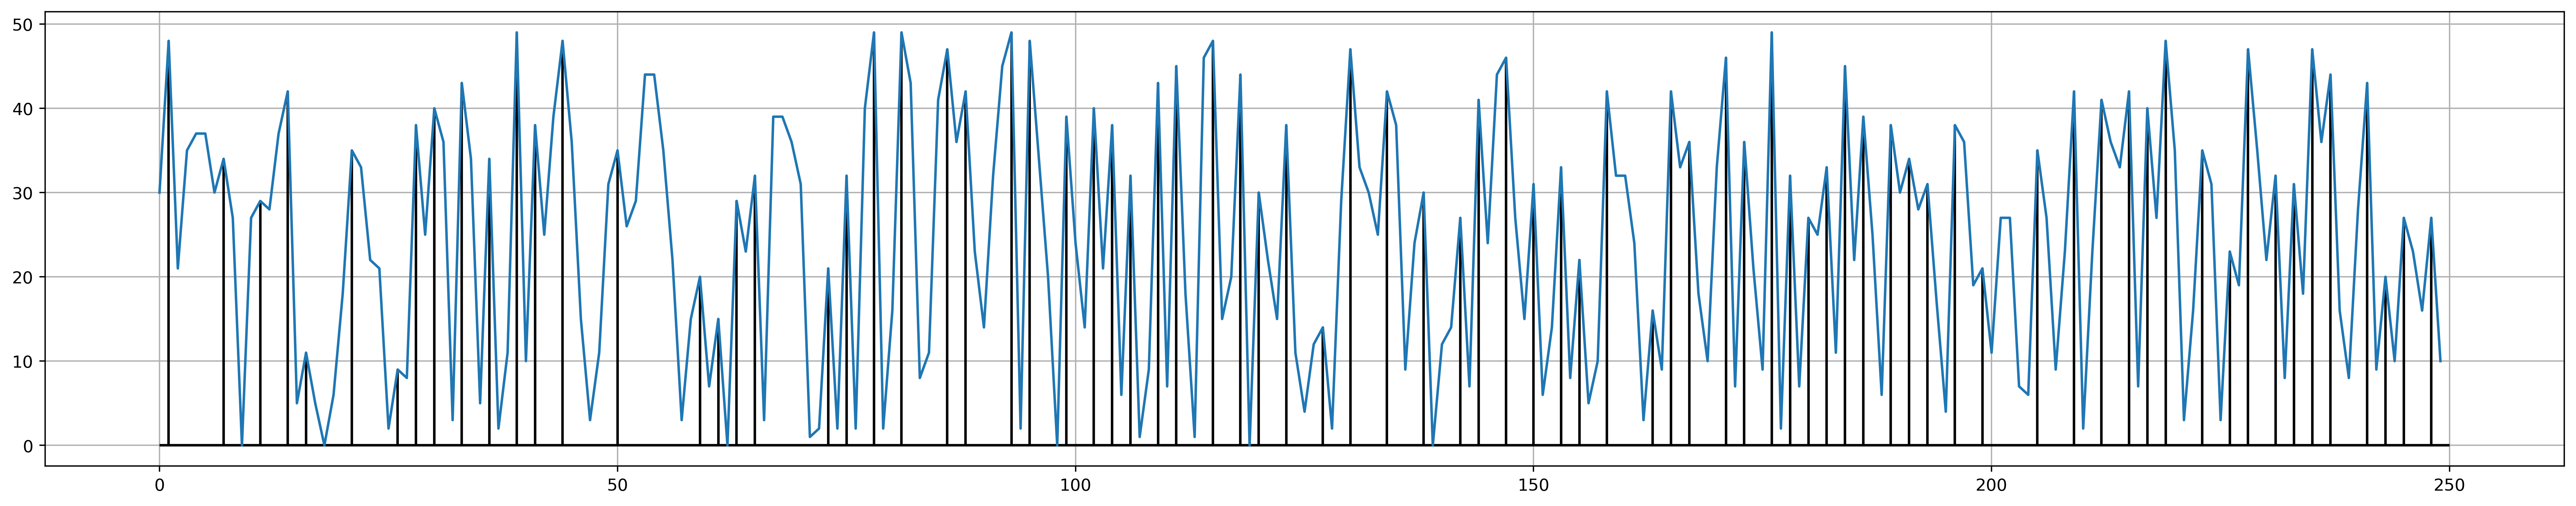

In [17]:
randoms = np.random.randint(50,size=250)
plt.figure(figsize=(27,5),dpi=400)
plt.plot(randoms)
for tup in peak(randoms)[1]:
    plt.vlines(tup[1],0,tup[0],'k')
plt.hlines(0,0,len(randoms),'k')
plt.grid()

In [18]:
peak(randoms)[0]

81

In [19]:
def perm(n,r):
    if(n==r):
        return 1
    return n*perm(n-1,r)

In [20]:
perm(6,4)

30

In [21]:
int(fact(6)/fact(4))

30

In [22]:
def comb(n,r):
    return int(perm(n,r)/fact(n-r))

In [23]:
comb(6,4)

15

In [24]:
int(fact(6)/(fact(4)*fact(2)))

15

In [25]:
def polyDer(C):
    dC = []
    n = len(C)-1
    k = 0
    while n != 0:
        dC.append(n*C[k])
        n -= 1
        k += 1
    return dC

In [26]:
polyDer(polyDer([1,4,6,4,1]))

[12, 24, 12]

In [27]:
def kN_Matrix(C):
    n = len(C) - 1
    Matrix = [C]
    for k in range(n-1):
        Matrix.append(polyDer(Matrix[k]))
    return Matrix

In [28]:
np.array(kN_Matrix([1,4,6,4,1]))

array([list([1, 4, 6, 4, 1]), list([4, 12, 12, 4]), list([12, 24, 12]),
       list([24, 24])], dtype=object)

In [29]:
def polyInt(C):
    iC = []
    n = len(C)
    k = 0
    while n != 0:
        iC.append(np.float64(C[k]/n))
        n -= 1
        k += 1
    iC.append(1)
    return iC

In [30]:
polyDer(polyInt([3,2,1]))

[3.0, 2.0, 1.0]

In [31]:
def polyVal(C,x):
    n = len(C)-1
    val = 0
    for k in C:
        val += k*np.power(x,n)
        n -= 1
    return val

In [32]:
polyVal([1,2,1,2],5)

182

In [33]:
np.power(5,3)+2*np.power(5,2)+np.power(5,1)+2

182

In [34]:
def peak2D(L):
    count = 0
    pL = []
    for i in range(1,len(L)):
        for j in range(1,len(L[i])):
            if(L[i][j] > L[i-1][j] and L[i][j] > L[i+1][j] and L[i][j] > L[i][j-1] and L[i][j] > L[i][j+1]):
                count += 1
                pL.append((L[i][j],(i,j)))
    return (count,pL)

In [35]:
L = [[1,2,3,4,5],
     [2,4,1,5,1],
     [1,3,0,3,2],
     [5,2,1,4,3],
     [4,1,1,1,1]]

In [36]:
peak2D(L)

(3, [(4, (1, 1)), (5, (1, 3)), (4, (3, 3))])

In [37]:
x = np.linspace(-5,5,500)
y = 3*np.power(x,3)-np.power(x,2)+4*x+6

def Y(x):
    return 3*np.power(x,3)-np.power(x,2)+4*x+6
dy = []
for i in x:
    dy.append(diff(Y,i,.00001))
dy = np.array(dy)

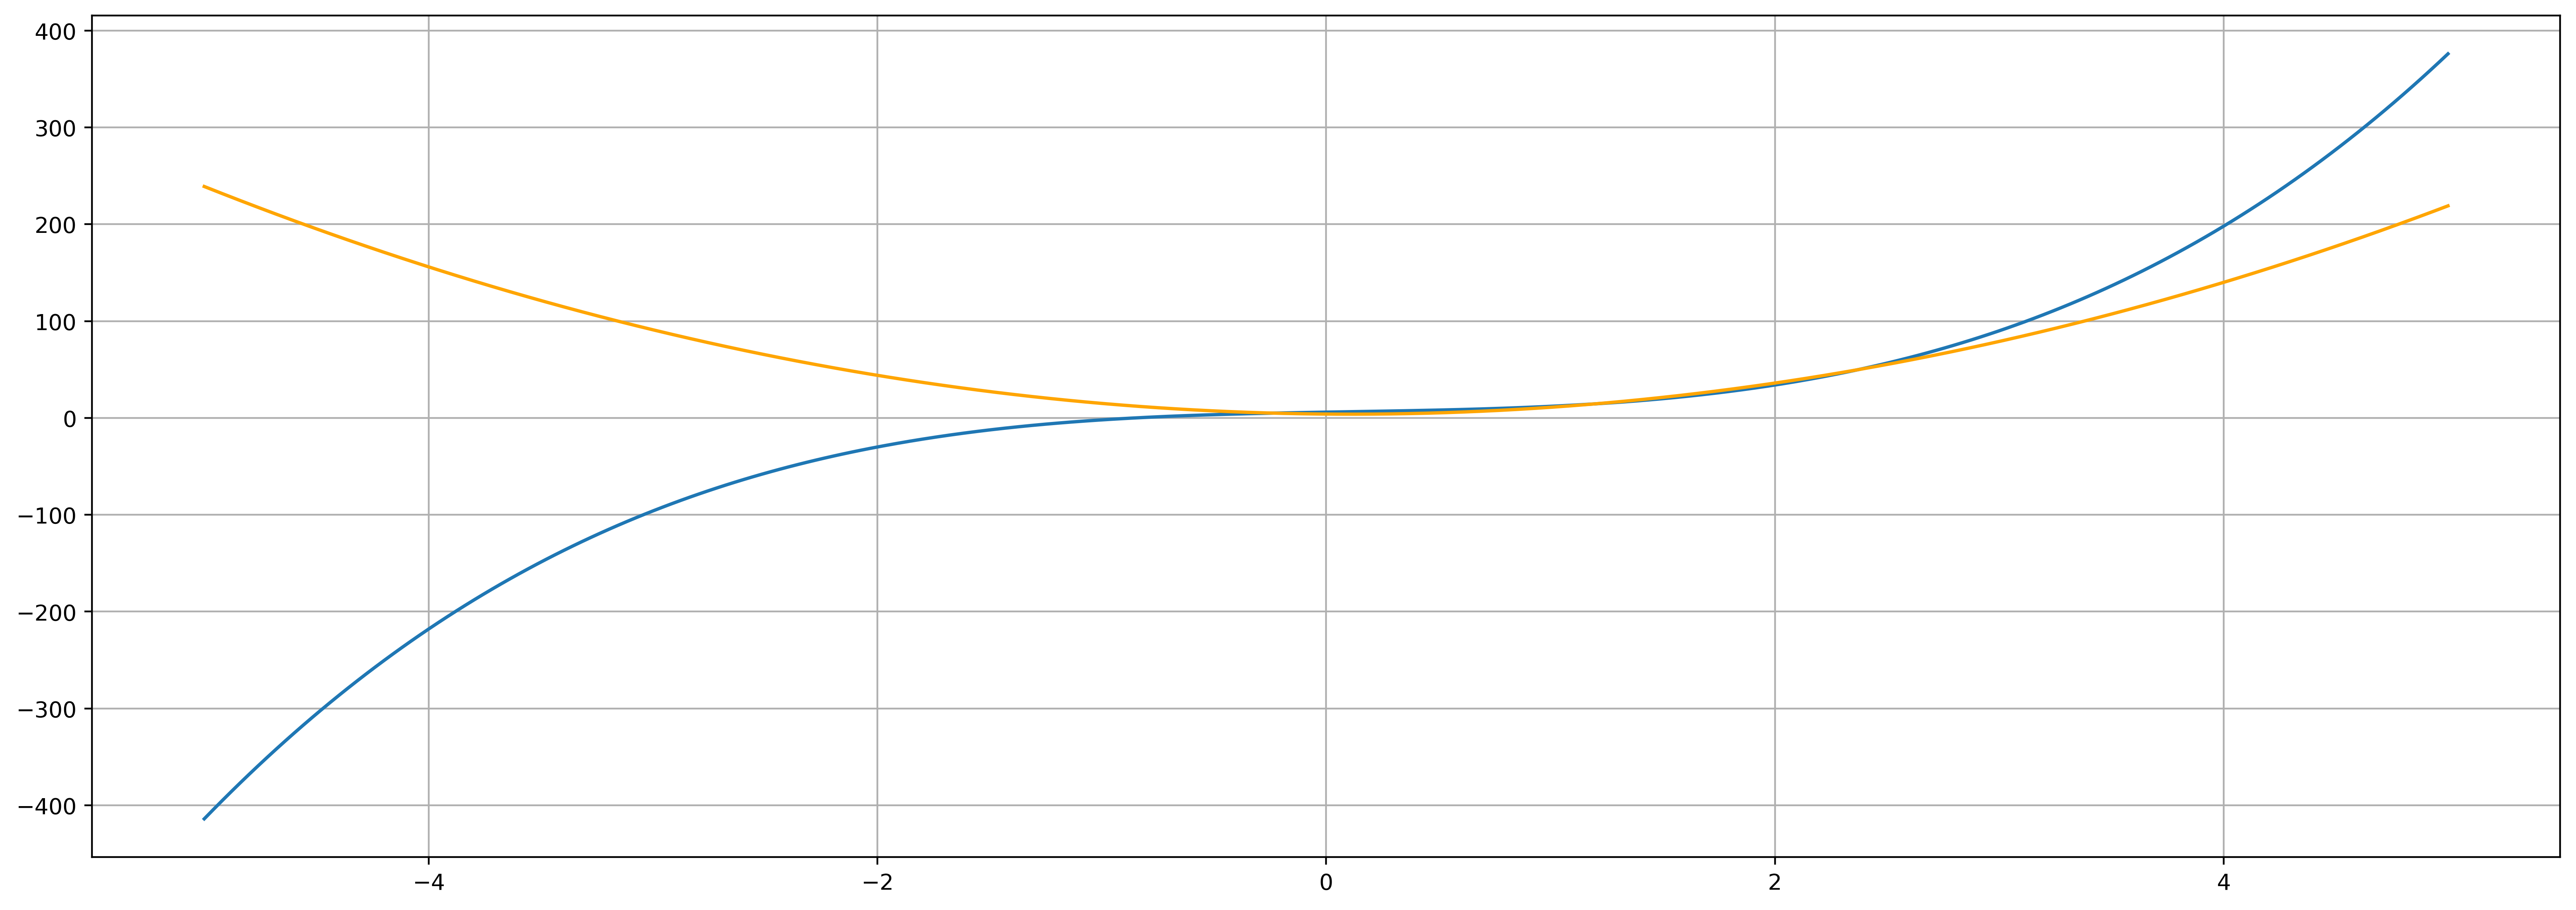

In [38]:
plt.figure(figsize=(20,7),dpi=400)
plt.plot(x,y)
plt.plot(x,dy,'orange')
plt.grid()

In [39]:
def integrate(l,h,f,dx):
    s = 0
    ndx = 0
    while(l+ndx <= h):
        s += np.float64(f(l+ndx)*dx)
        ndx += dx
    return s

In [40]:
integrate(0,2,Y,.00001) + integrate(2,3,Y,.00001)

87.75048000064058

In [41]:
3*np.power(3,4)/4-np.power(3,3)/3+2*3*3+6*3

87.75

In [42]:
x = np.linspace(-3*np.pi,3*np.pi,500)
y = (3*np.power(x,4)-np.power(x,3)+4*x+6)*np.sin(np.pi*x)

def Y(x):
    return (3*np.power(x,4)-np.power(x,3)+4*x+6)*np.sin(np.pi*x)

xplus = []
for k in x:
    if k >= 0:
        xplus.append(k)

xminus = []
for k in x:
    if k < 0:
        xminus.append(k)

xminus = xminus[::-1]

iyplus = [np.float64(integrate(0,xplus[0],Y,.00001))]
iyminus = [-np.float64(integrate(xminus[0],0,Y,.00001))]

for i in range(1,len(xplus)):
    iyplus.append(iyplus[i-1]+np.float64(integrate(xplus[i-1],xplus[i],Y,.00001)))

for i in range(1,len(xminus)):
    iyminus.append(iyminus[i-1]-np.float64(integrate(xminus[i],xminus[i-1],Y,.00001)))

iyminus = iyminus[::-1]
iy = iyminus+iyplus
iy = np.array(iy)

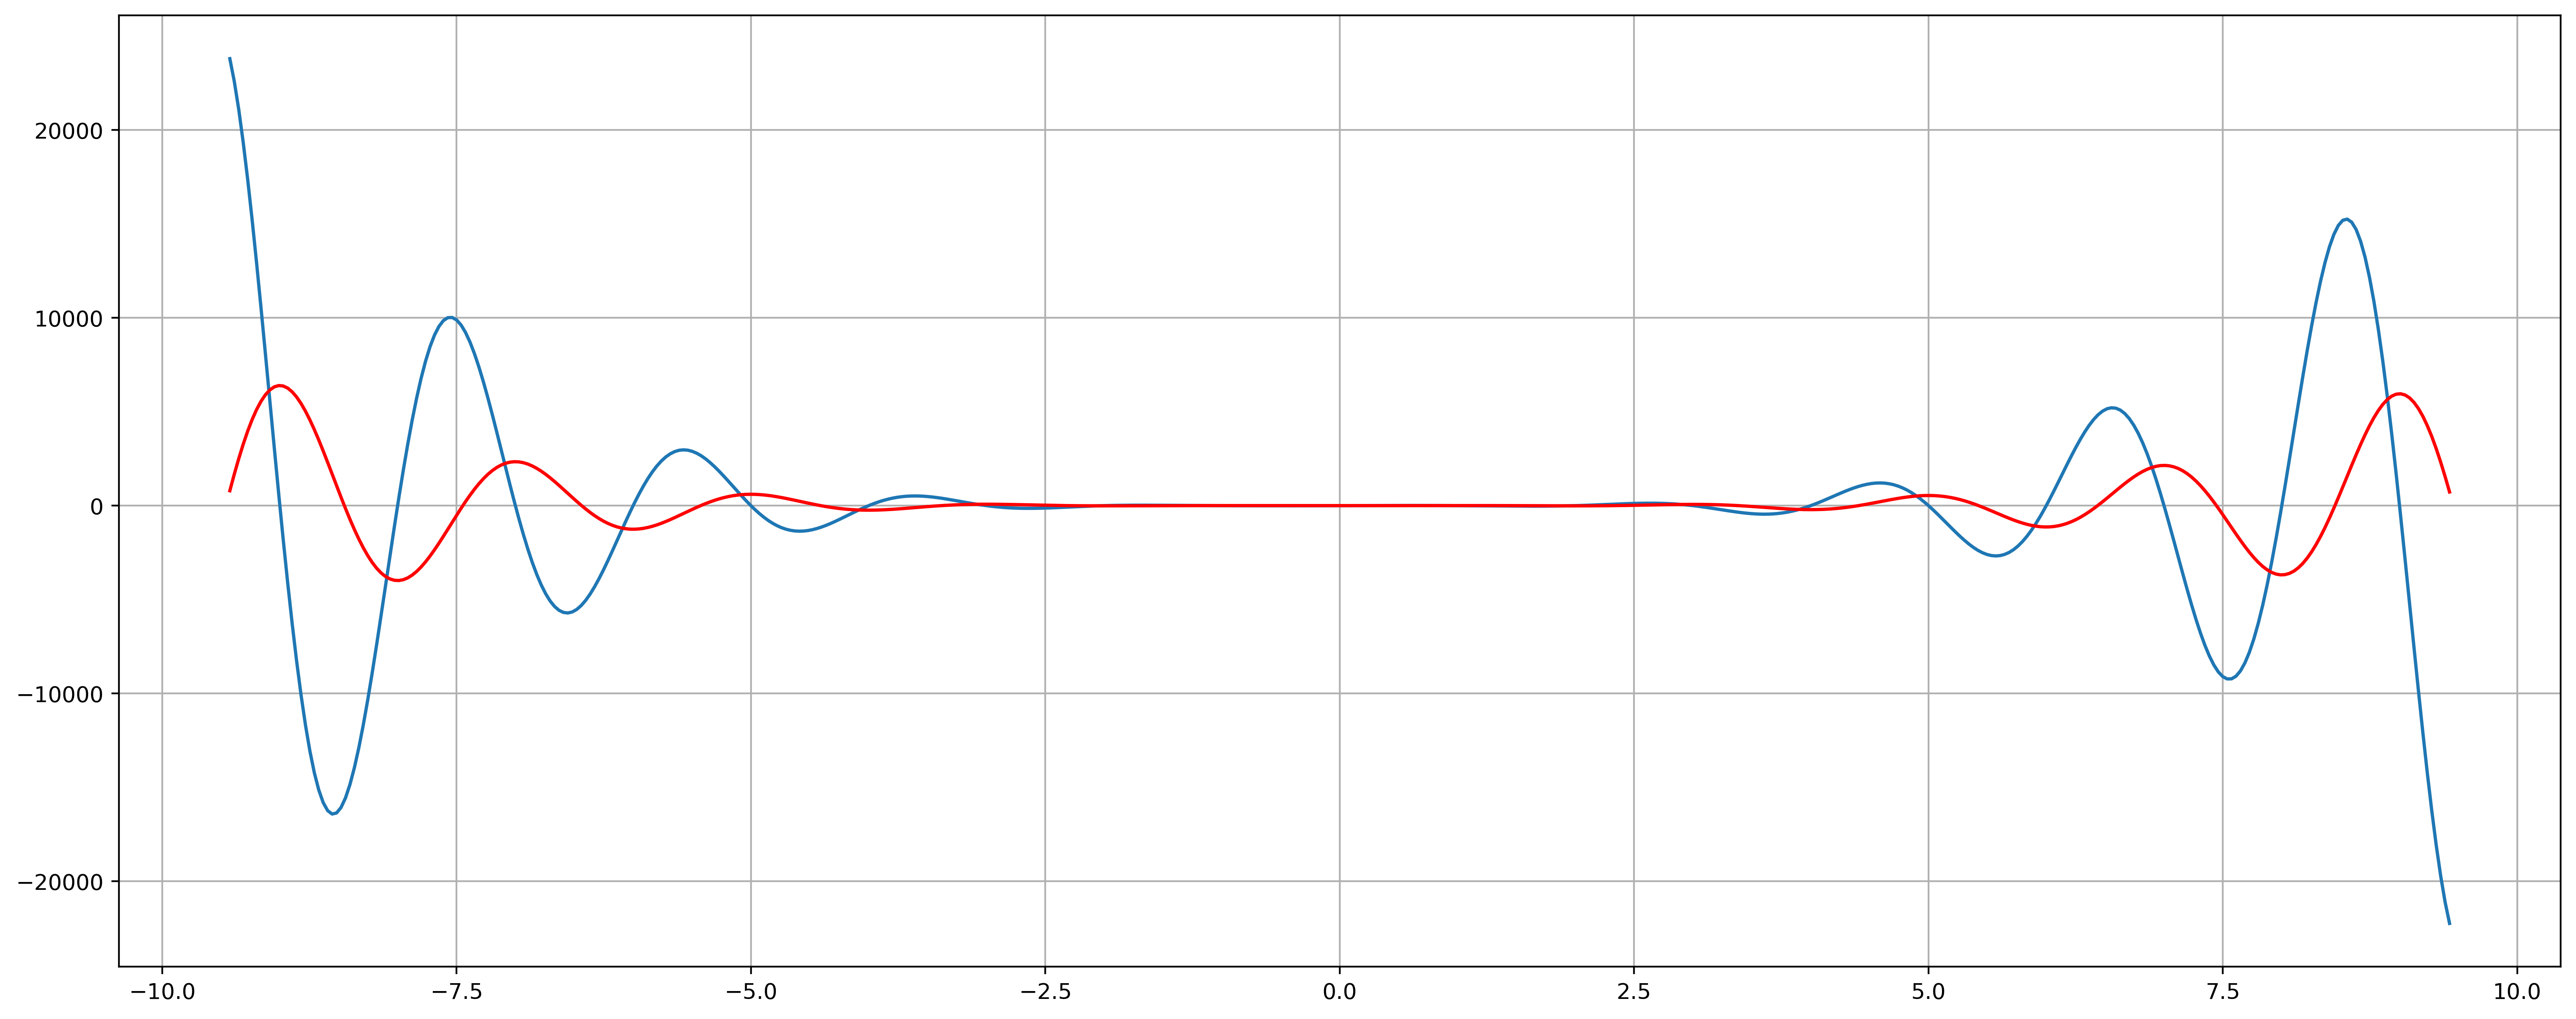

In [43]:
plt.figure(num=None, figsize=(20,8),dpi=400)
plt.plot(x,y)
plt.plot(x,iy,'red')
plt.grid()

In [44]:
def lim(f,a,dx=.00000000001):
    if(f(a-dx) == f(a+dx)):
        return f(a+dx)
    else:
        return False

In [45]:
def f(x):
    return (np.sqrt(1+x*x)-np.sqrt(1+x))/(np.sqrt(1+x*x*x)-np.sqrt(1+x))

In [46]:
lim(f,0)

1.0

In [47]:
def inflim(f,dx=.00000000001):
    t = 99999
    ldx = np.log(dx)
    while(True):
        y1 = np.log(f(t)) - np.log(100*t)
        if(y1 <= ldx and f(t+dx)==f(t-dx)):
            return f(t+dx)
        elif(y1 > 1):
            return False
        t *= 10

In [48]:
def f2(x):
    return (2*(x+1)*x)/(x*x+70*x-1)

In [49]:
inflim(f2)

1.999999986199862

In [50]:
def zerolim(f,dx=.00000000001):
    if(f(-dx) == f(dx)):
        return f(dx)
    else:
        return False

In [51]:
def f(x):
    return np.sin(x)/(x)

In [52]:
zerolim(f)

1.0

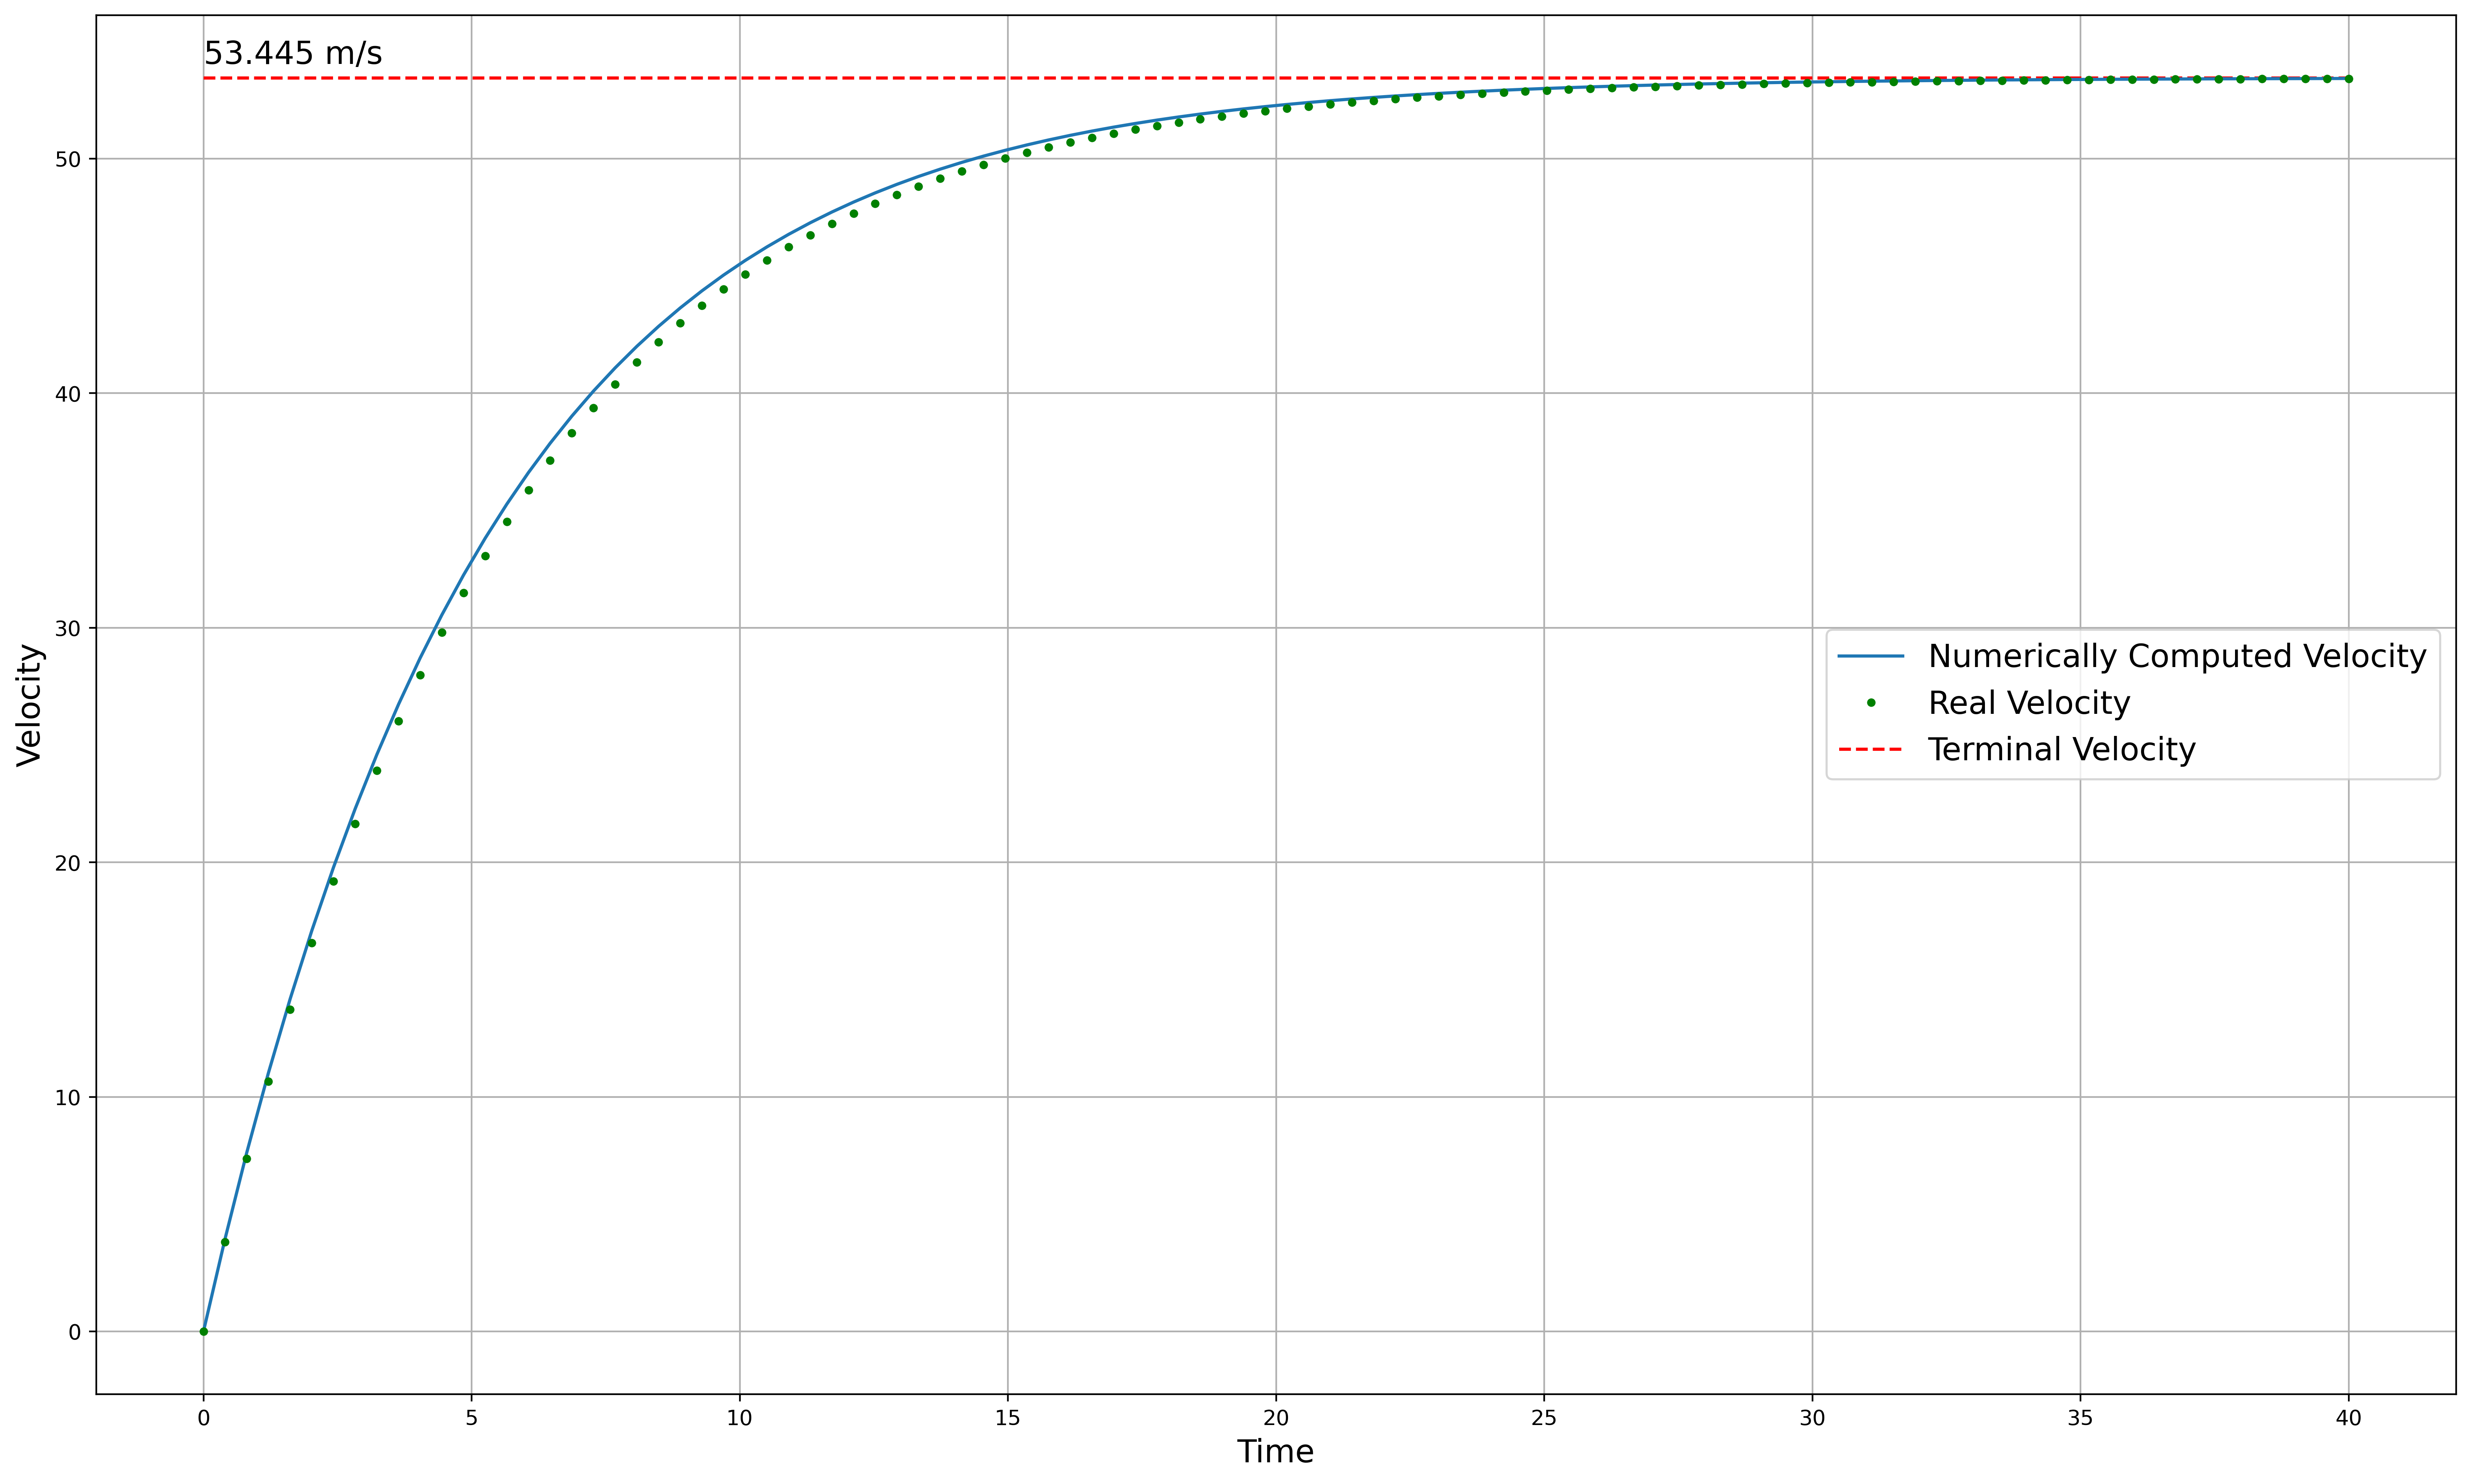

In [53]:
c = 12.5
m = 68.1
g = 9.81
p = 100
terminal = g*m/c
t = np.linspace(0,40,p)
v = np.zeros(p)
s = np.zeros(p)
for i in range(1,p):
    dv = g - c*v[i-1]/m
    dt = t[i]-t[i-1]
    v[i] = v[i-1] + dv*dt
    s[i] = s[i-1] + v[i-1]*dt

V = g*m*(1-np.exp(-c*t/m))/c
S = (g*m/c)*(t+(m/c)*np.exp(-(c/m)*t)-(m/c))
plt.figure(figsize=(20,12),dpi=400)
plt.plot(t,v,label='Numerically Computed Velocity')
plt.plot(t,V,'g.',label='Real Velocity')
plt.hlines(terminal,0,40,'red','dashed',label='Terminal Velocity')
plt.text(0,terminal+.6,str(round(terminal,3))+' m/s',fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Velocity',fontsize=15)
plt.legend(loc = 7, fontsize=15)
plt.grid()

In [54]:
def V(x):
    return (g*m/c)*(1-np.exp(-c*x/m))

In [55]:
integrate(0,40,V,1/p)

1846.548938558231

In [56]:
T = 40
dst = (g*m/c)*(T + (m/c)*np.exp(-(c/m)*T) - (m/c))
print(dst)

1846.8160715845902


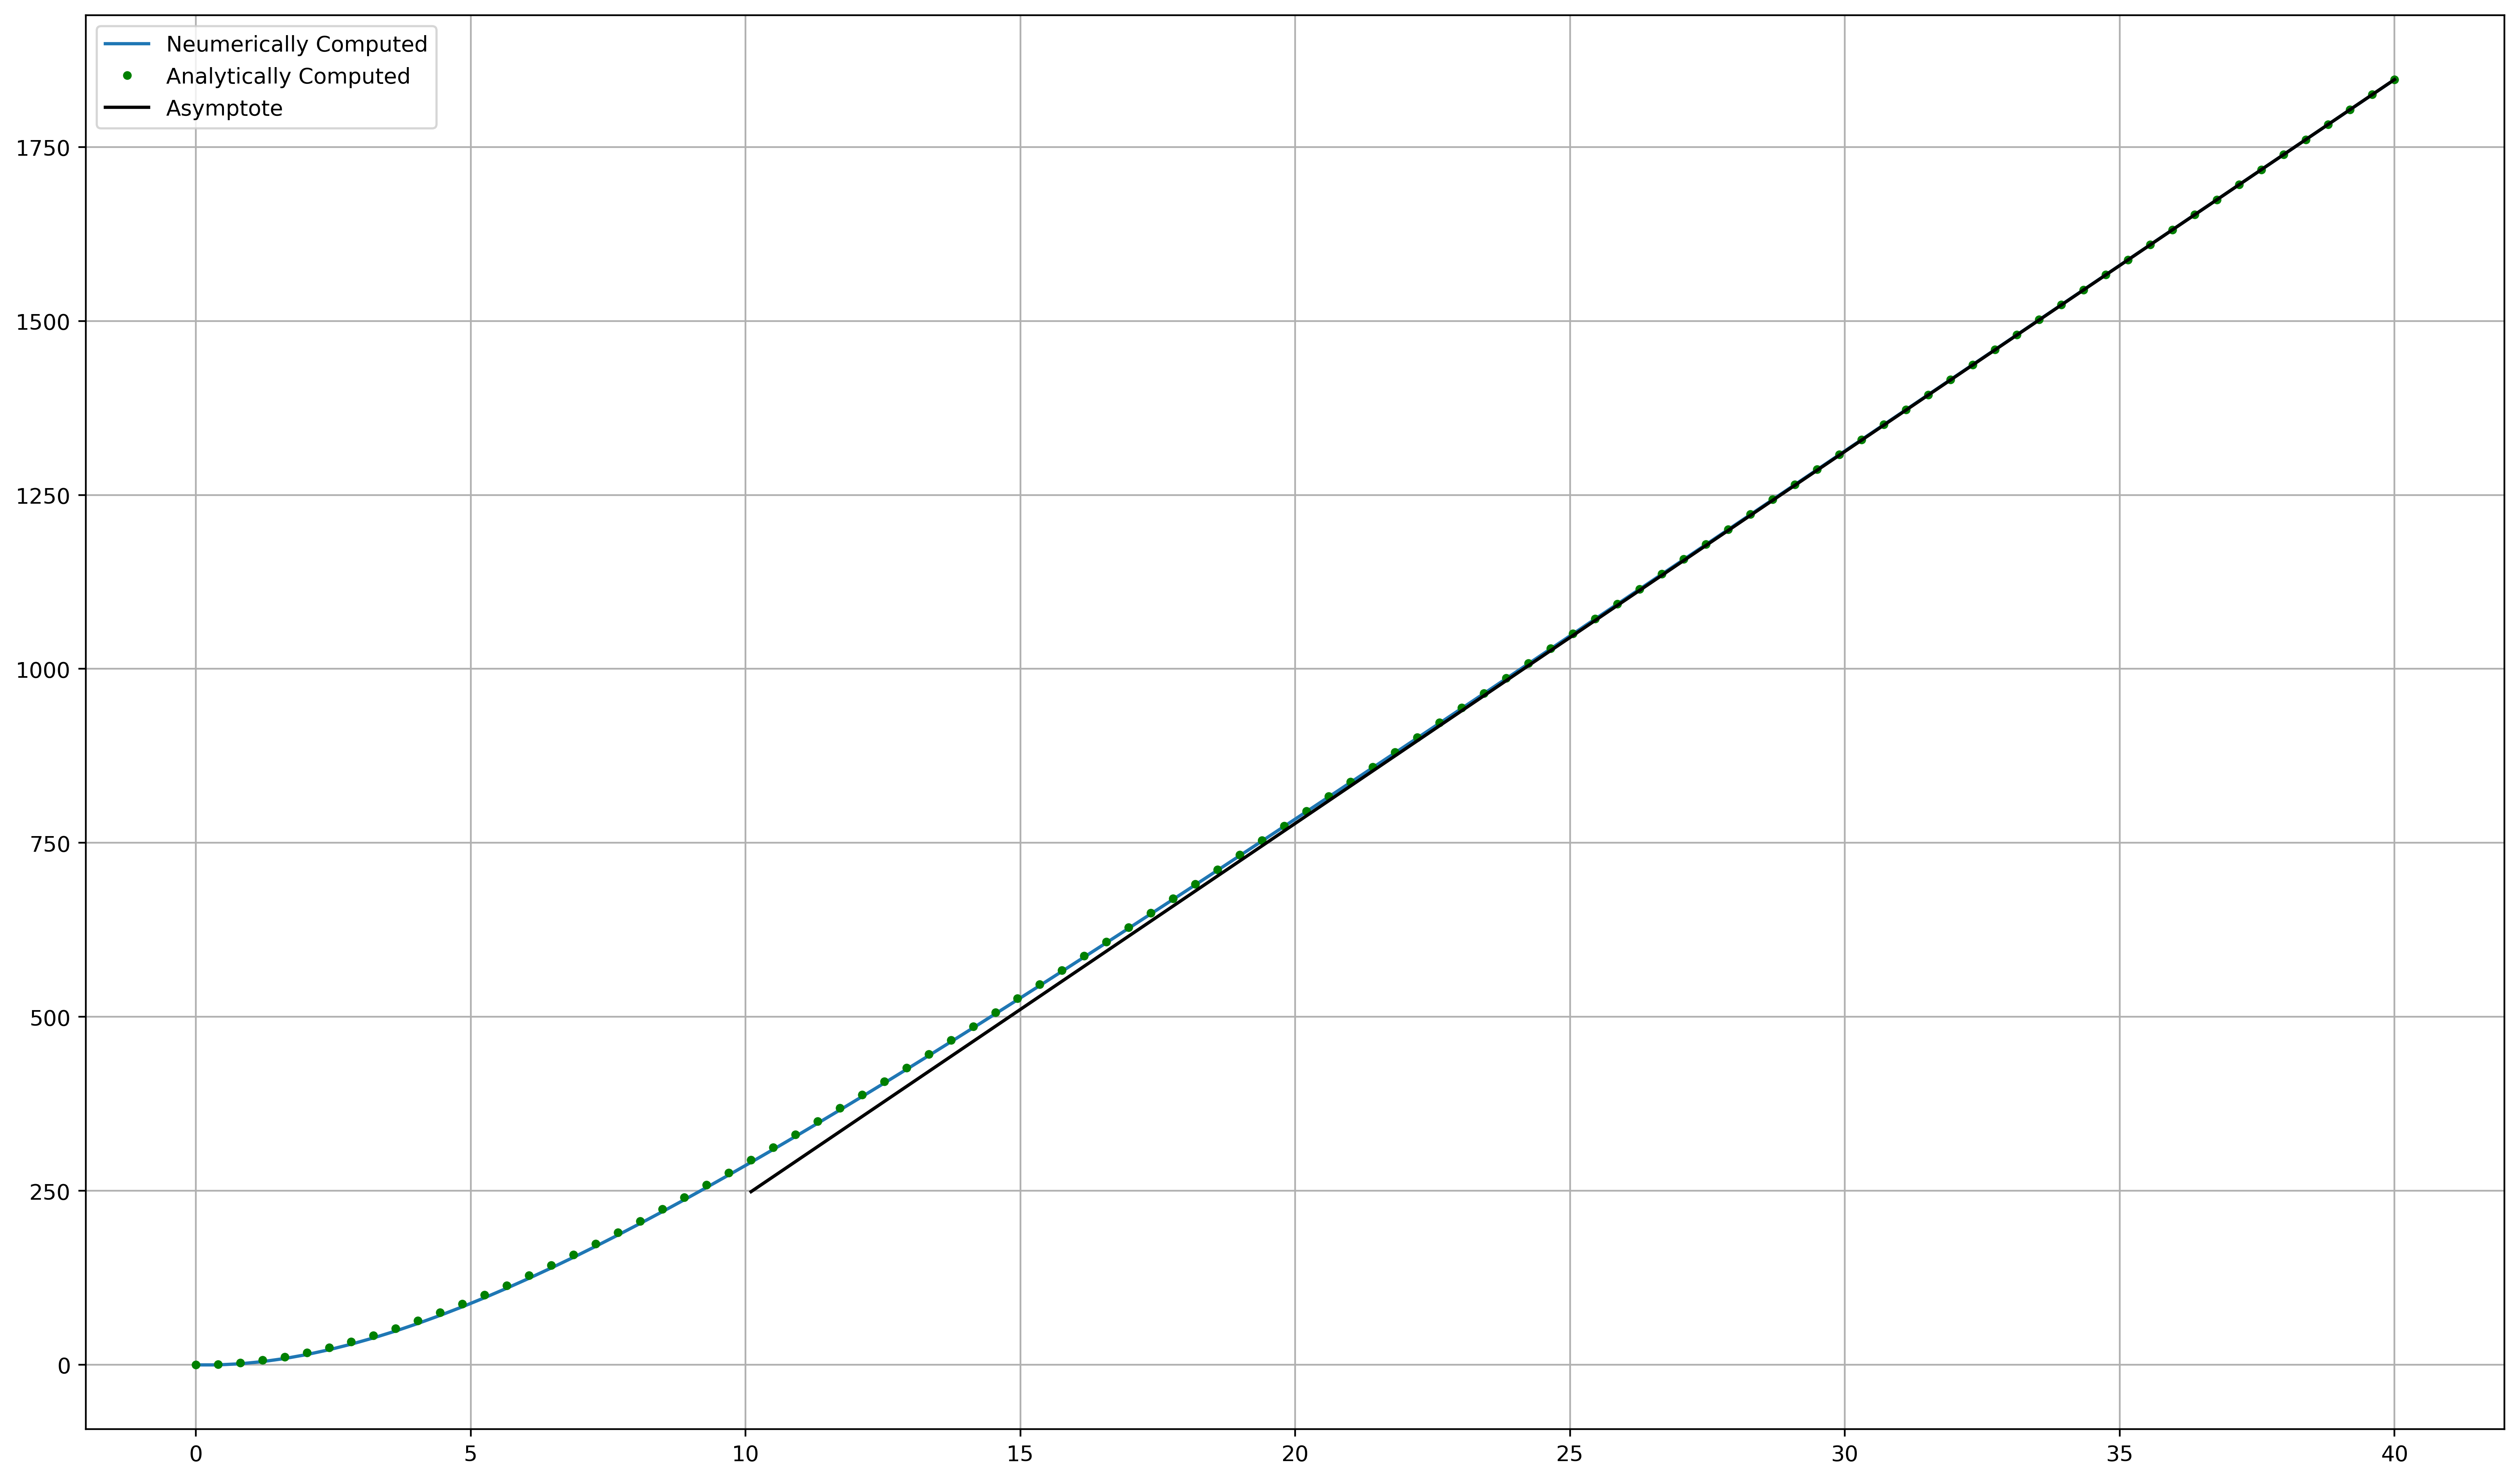

In [57]:
plt.figure(figsize=(20,12),dpi=400)
plt.plot(t,s,label='Neumerically Computed')
plt.plot(t,S,'g.',label='Analytically Computed')
vt = dst + g*m*(t[25:]-40)/c
plt.plot(t[25:],vt,'k',label='Asymptote')
plt.legend()
plt.grid()

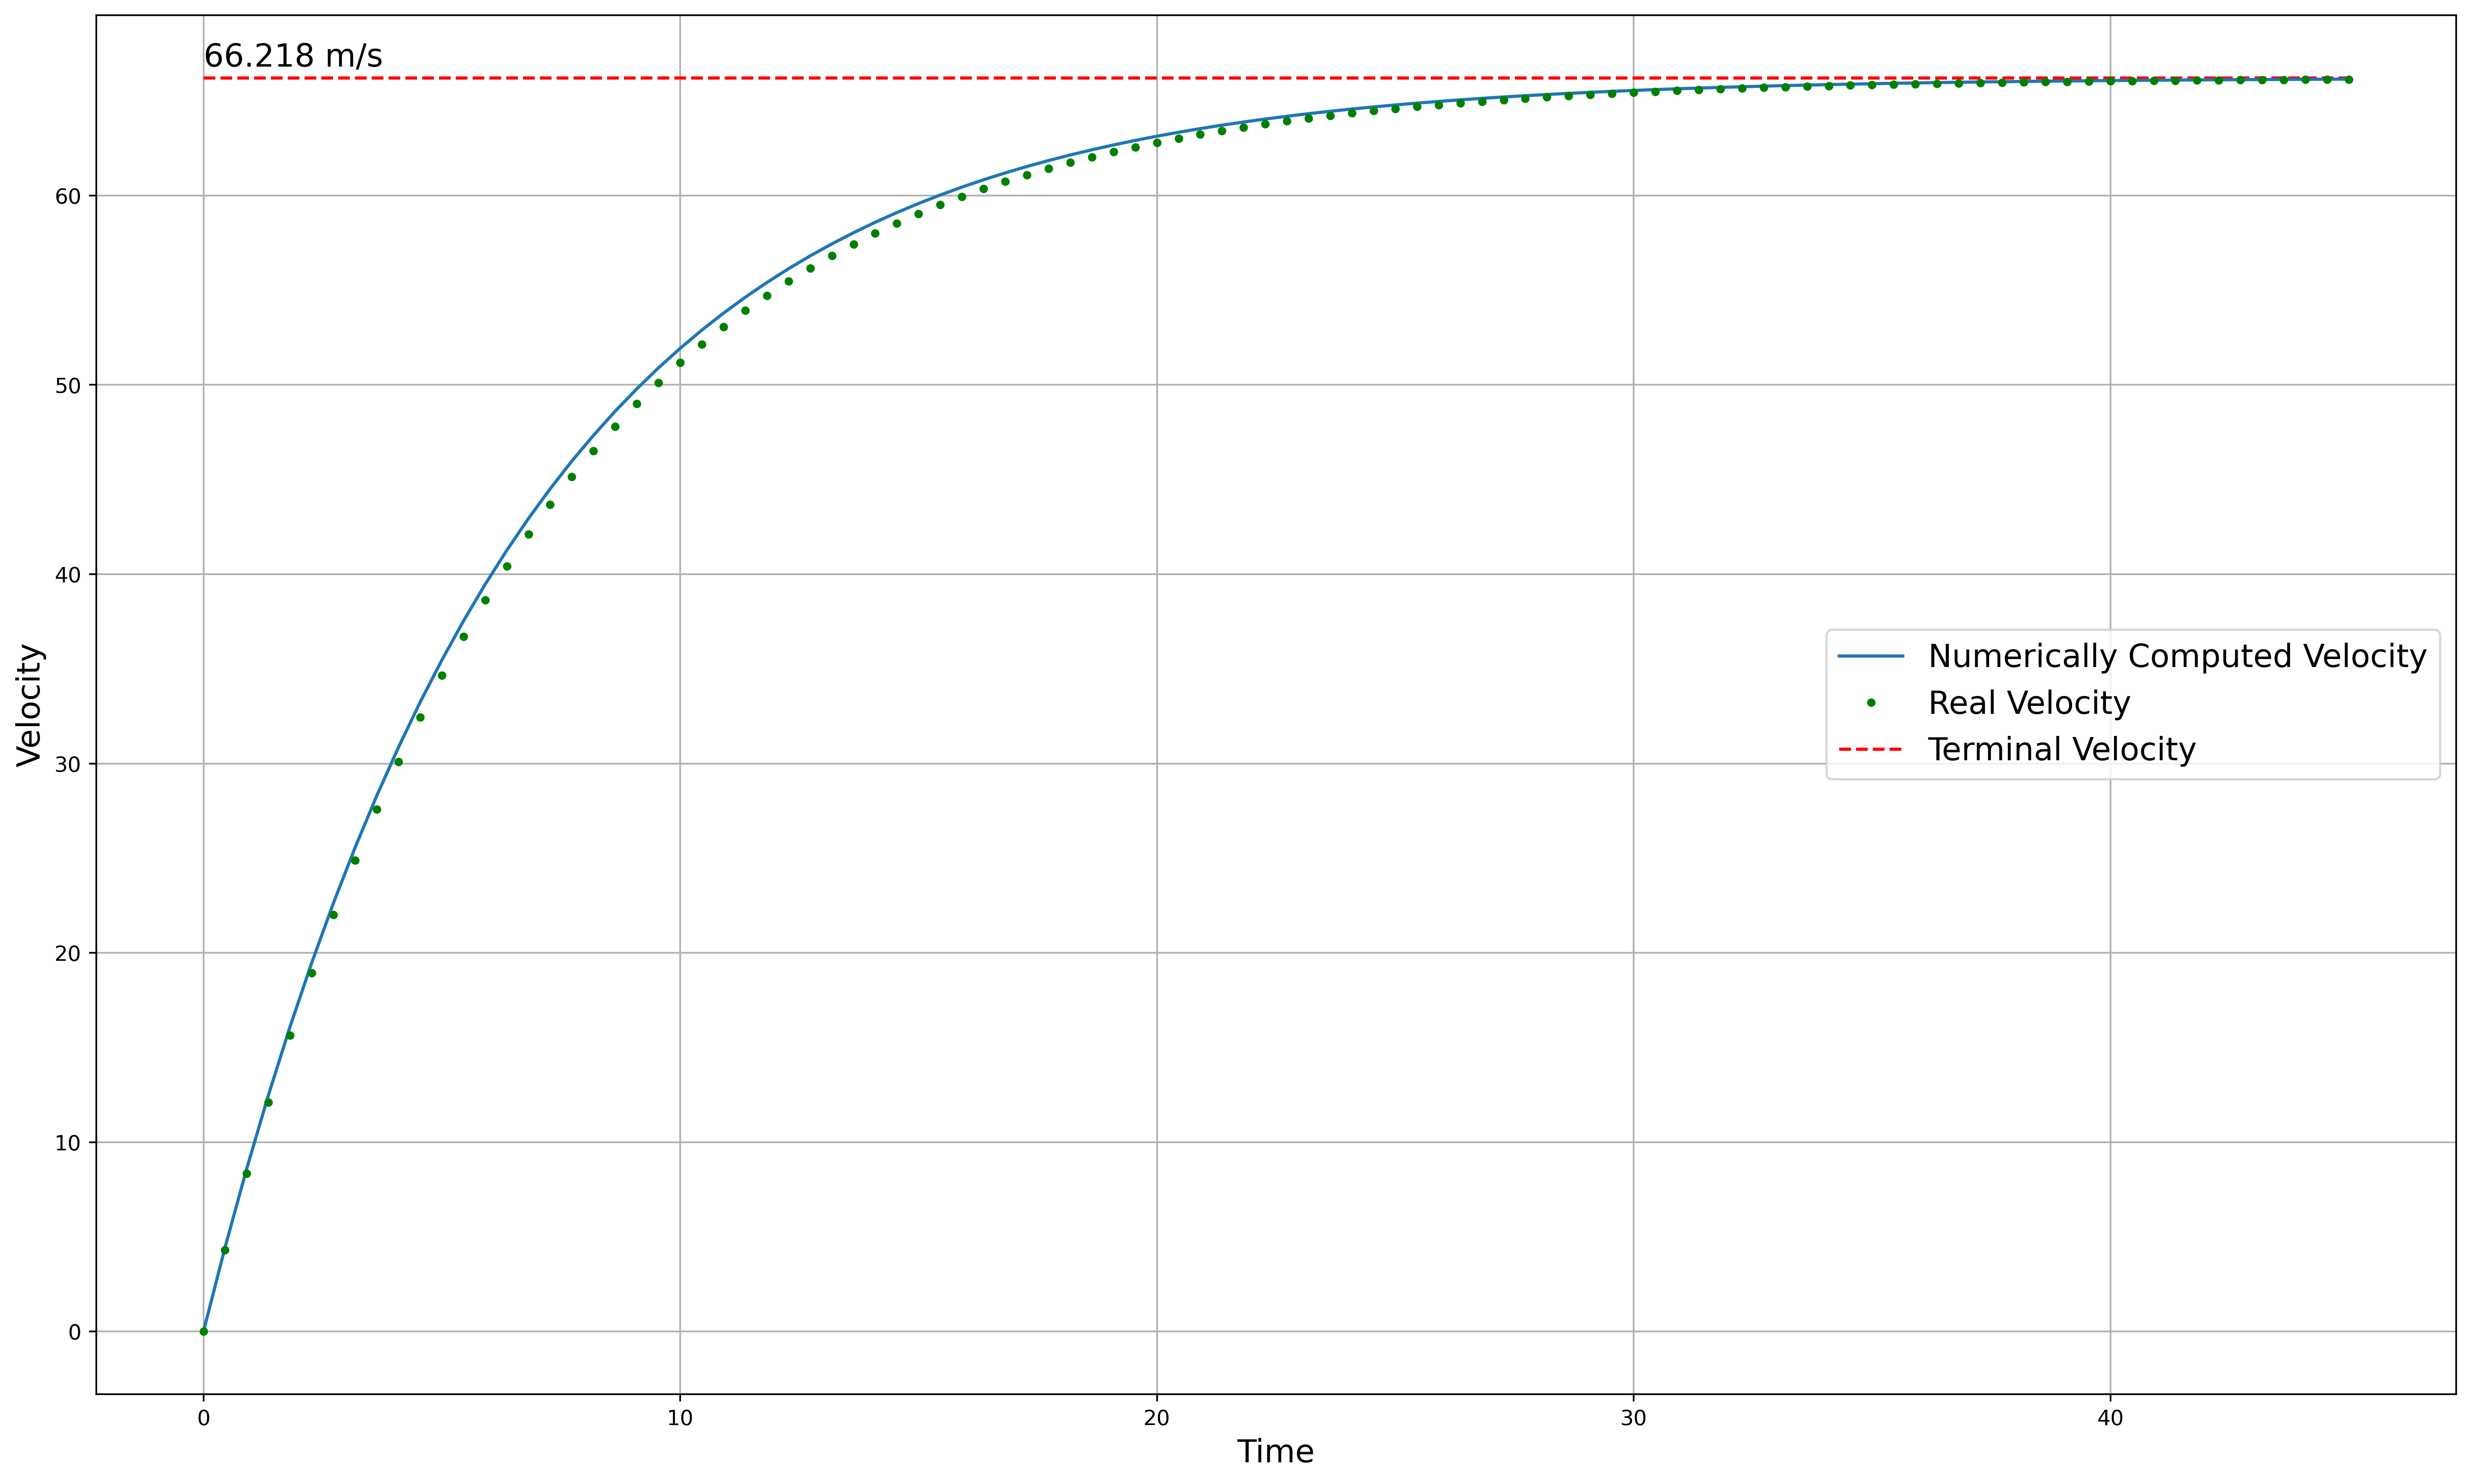

In [58]:
m = 81 #KG
g = 9.81 #ms-2
H = 180 #meter
c = 12
p = 100
terminal = g*m/c
t = np.linspace(0,45,p)
v = np.zeros(p)
s = np.zeros(p)

for i in range(1,p):
    dv = g - c*v[i-1]/m
    dt = t[i]-t[i-1]
    v[i] = v[i-1] + dv*dt
    s[i] = s[i-1] + v[i-1]*dt

V = g*m*(1-np.exp(-c*t/m))/c
S = (g*m/c)*(t+(m/c)*np.exp(-(c/m)*t)-(m/c))
plt.figure(figsize=(20,12),dpi=400)
plt.plot(t,v,label='Numerically Computed Velocity')
plt.plot(t,V,'g.',label='Real Velocity')
plt.hlines(terminal,0,45,'red','dashed',label='Terminal Velocity')
plt.text(0,terminal+.6,str(round(terminal,3))+' m/s',fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Velocity',fontsize=15)
plt.legend(loc = 7, fontsize=15)
plt.grid()

In [59]:
P = 50000

In [60]:
def arcLength(f,xi,xf):
    x = np.linspace(xi,xf,P)
    y = f(x)
    length = 0
    for n in range(len(x)-1):
        length += np.sqrt(np.power(x[n+1]-x[n],2)+np.power(y[n+1]-y[n],2))
    return (length,x,y)

In [61]:
def f(x):
    return x*x - 2*x + 6

18.297576422750257


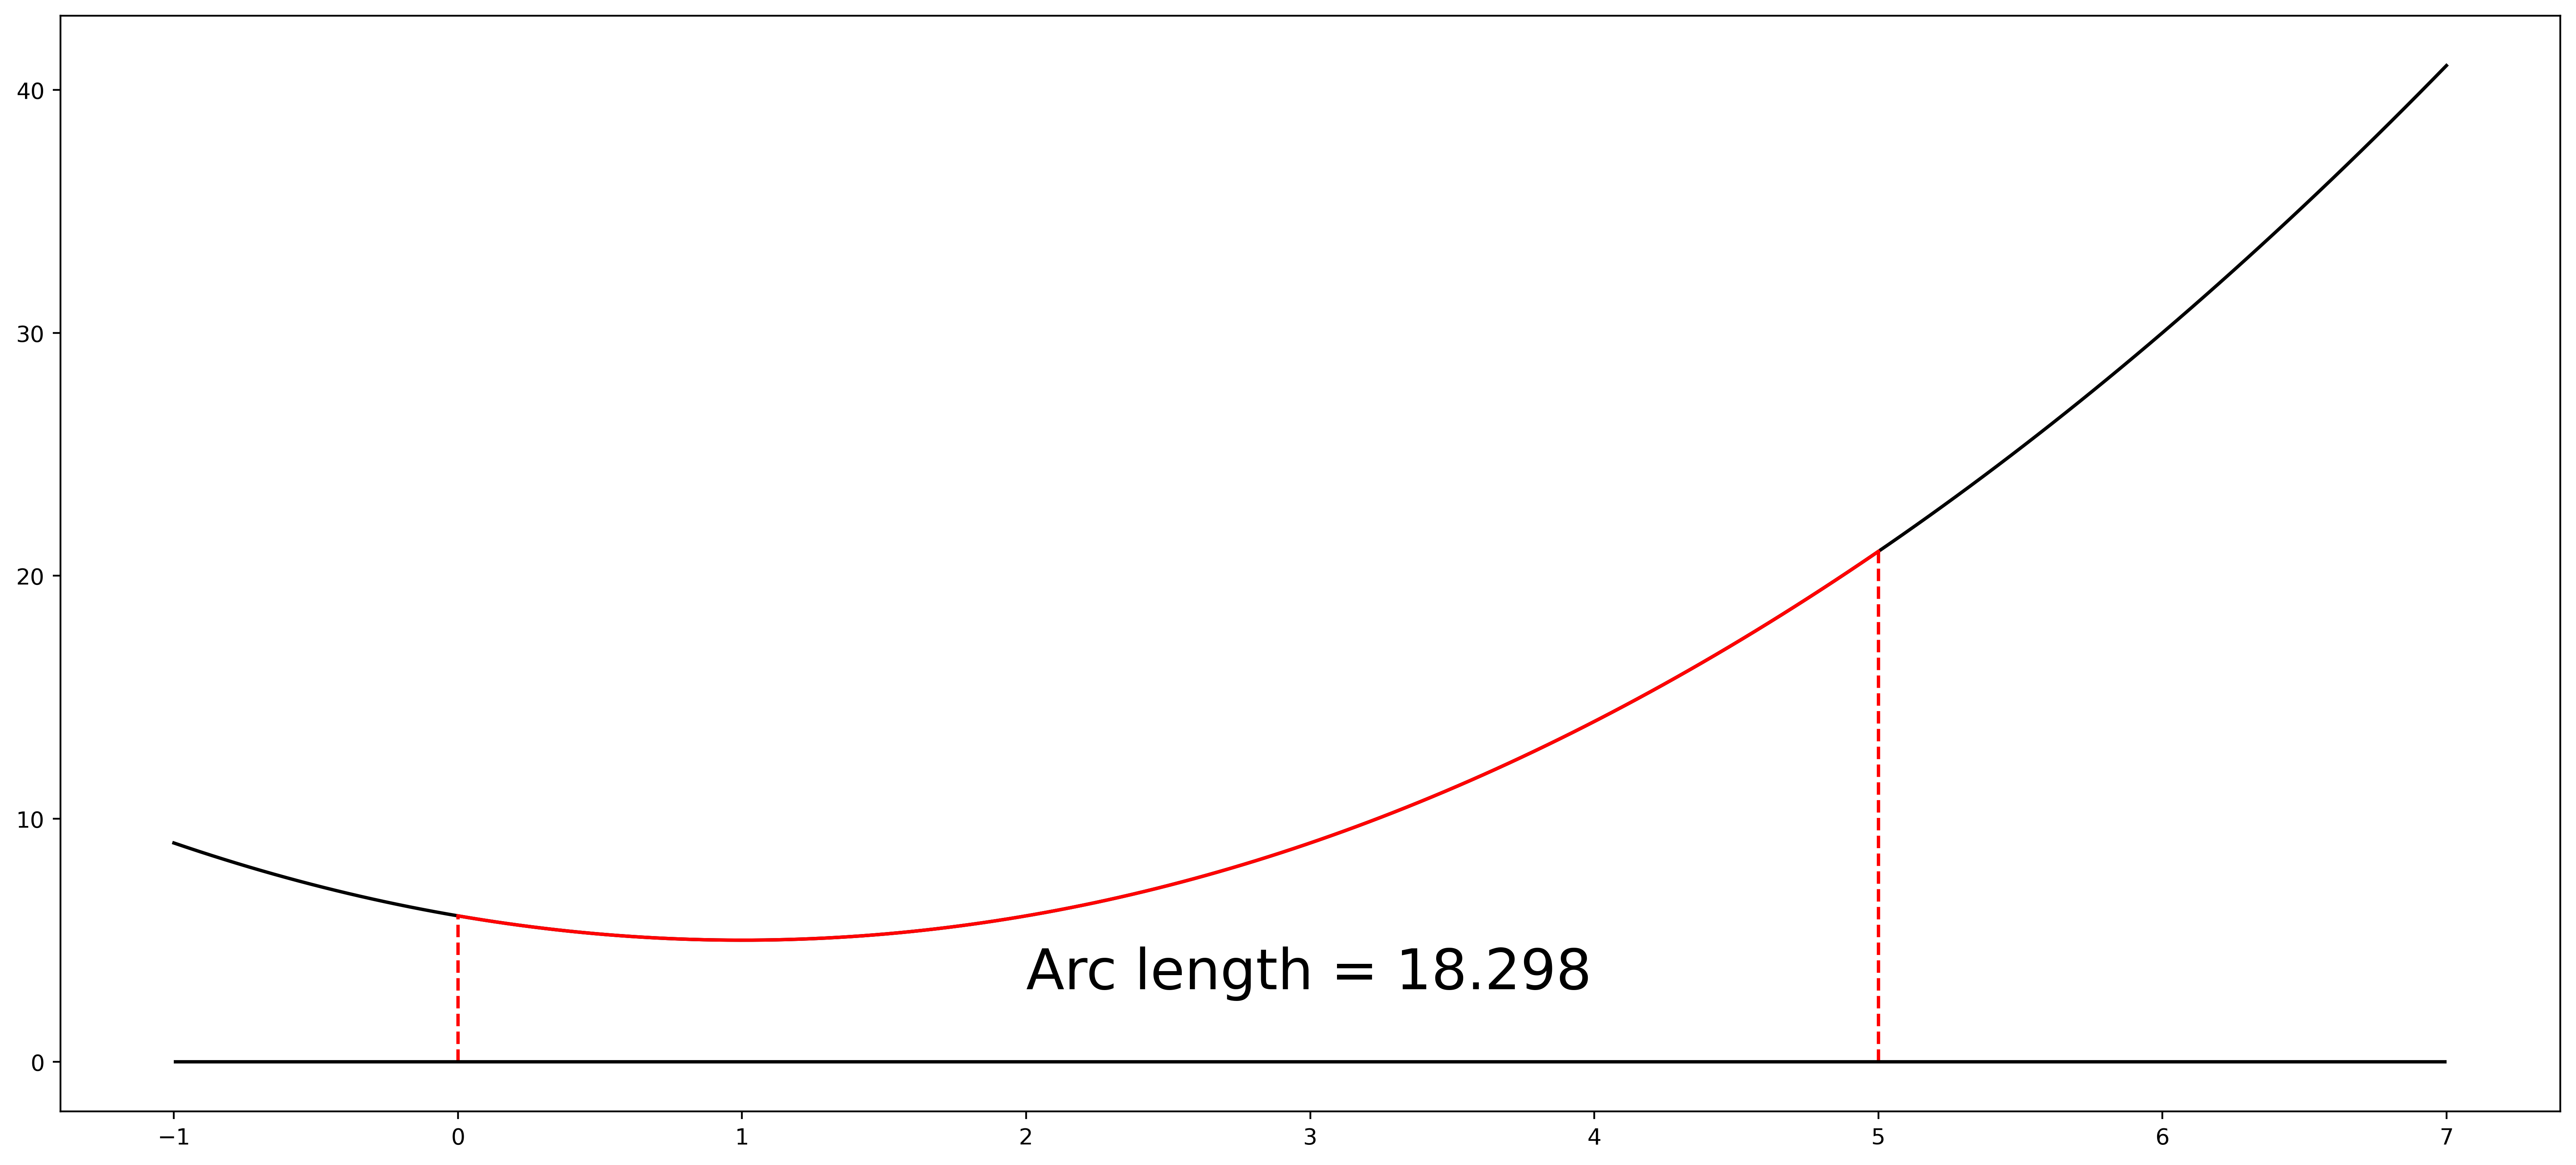

In [62]:
l,X,Y = arcLength(f,0,5)
print(l)
x = np.linspace(-1,7,P)
y = f(x)
plt.figure(figsize=(20,9),dpi=400)
plt.plot(x,y,'k')
plt.plot(X,Y,'red')
plt.text(2,f(2)-3,'Arc length = '+str(round(l,3)),fontsize=25)
plt.vlines(0,0,f(0),'red','dashed')
plt.vlines(5,0,f(5),'red','dashed')
plt.hlines(0,-1,7,'k');

In [63]:
def F(x):
    return np.sqrt(4*x*x-8*x+5)

In [64]:
round(integrate(0,5,F,1/P),3)

18.298

In [65]:
def C(x):
    return -np.sqrt(4-x*x)

6.283185158423706


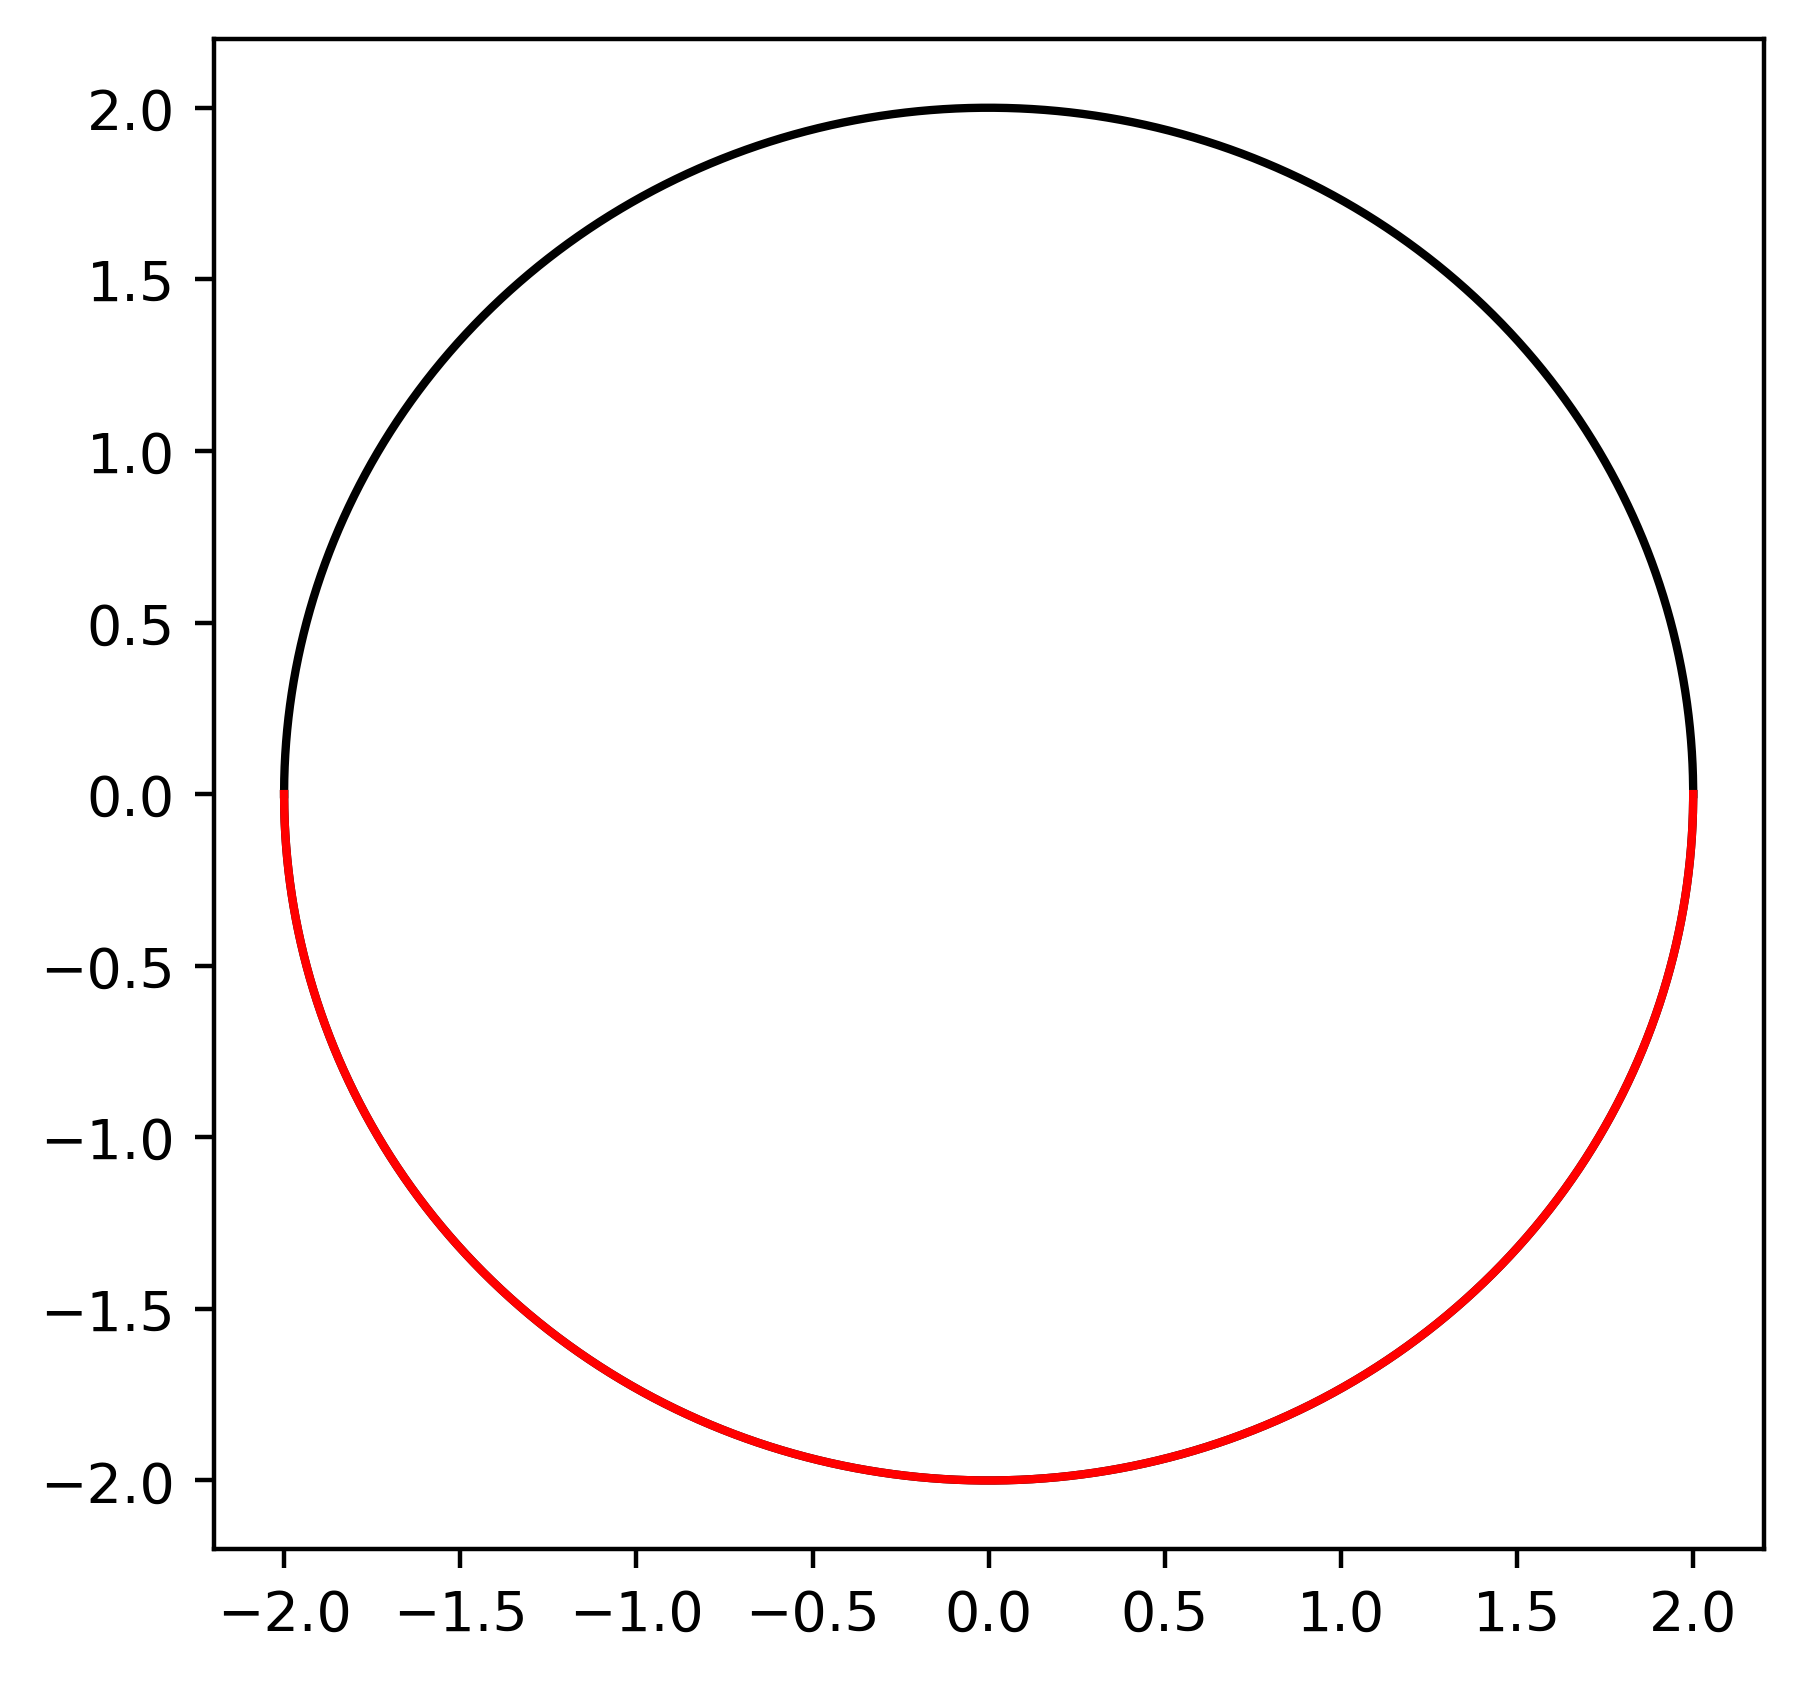

In [66]:
lc, Xc, Yc = arcLength(C,-2,2)
xc = np.linspace(-2,2,P)
ycp = np.sqrt(4-xc*xc)
ycn = -np.sqrt(4-xc*xc)
plt.figure(figsize=(5,5),dpi=400)
plt.plot(xc,ycp,'k',)
plt.plot(xc,ycn,'k')
plt.plot(Xc,Yc,'red')
print(lc)

In [67]:
print(2*np.pi)

6.283185307179586


In [68]:
def arcLnPnts(X,Y):
    if(not len(X) == len(Y)):
        return False
    else:
        length = 0
        for i in range(len(X)-1):
            length += np.sqrt(np.power(X[i+1]-X[i],2)+np.power(Y[i+1]-Y[i],2))
        return length

In [69]:
arcLnPnts(xc,ycn)

6.283185158423706

In [70]:
def arcLnPolar(f,theta1,theta2):
    theta = np.linspace(theta1,theta2,1000)
    r = f(theta)
    length = 0
    for i in range(len(theta)-1):
        length += np.sqrt(r[i]*r[i]+r[i+1]*r[i+1]-2*r[i]*r[i+1]*np.cos(theta[i+1]-theta[i]))
    return length,theta,r

In [71]:
def f(theta):
    return 1/(1-0.45*np.cos(theta))

0.8433826864128036


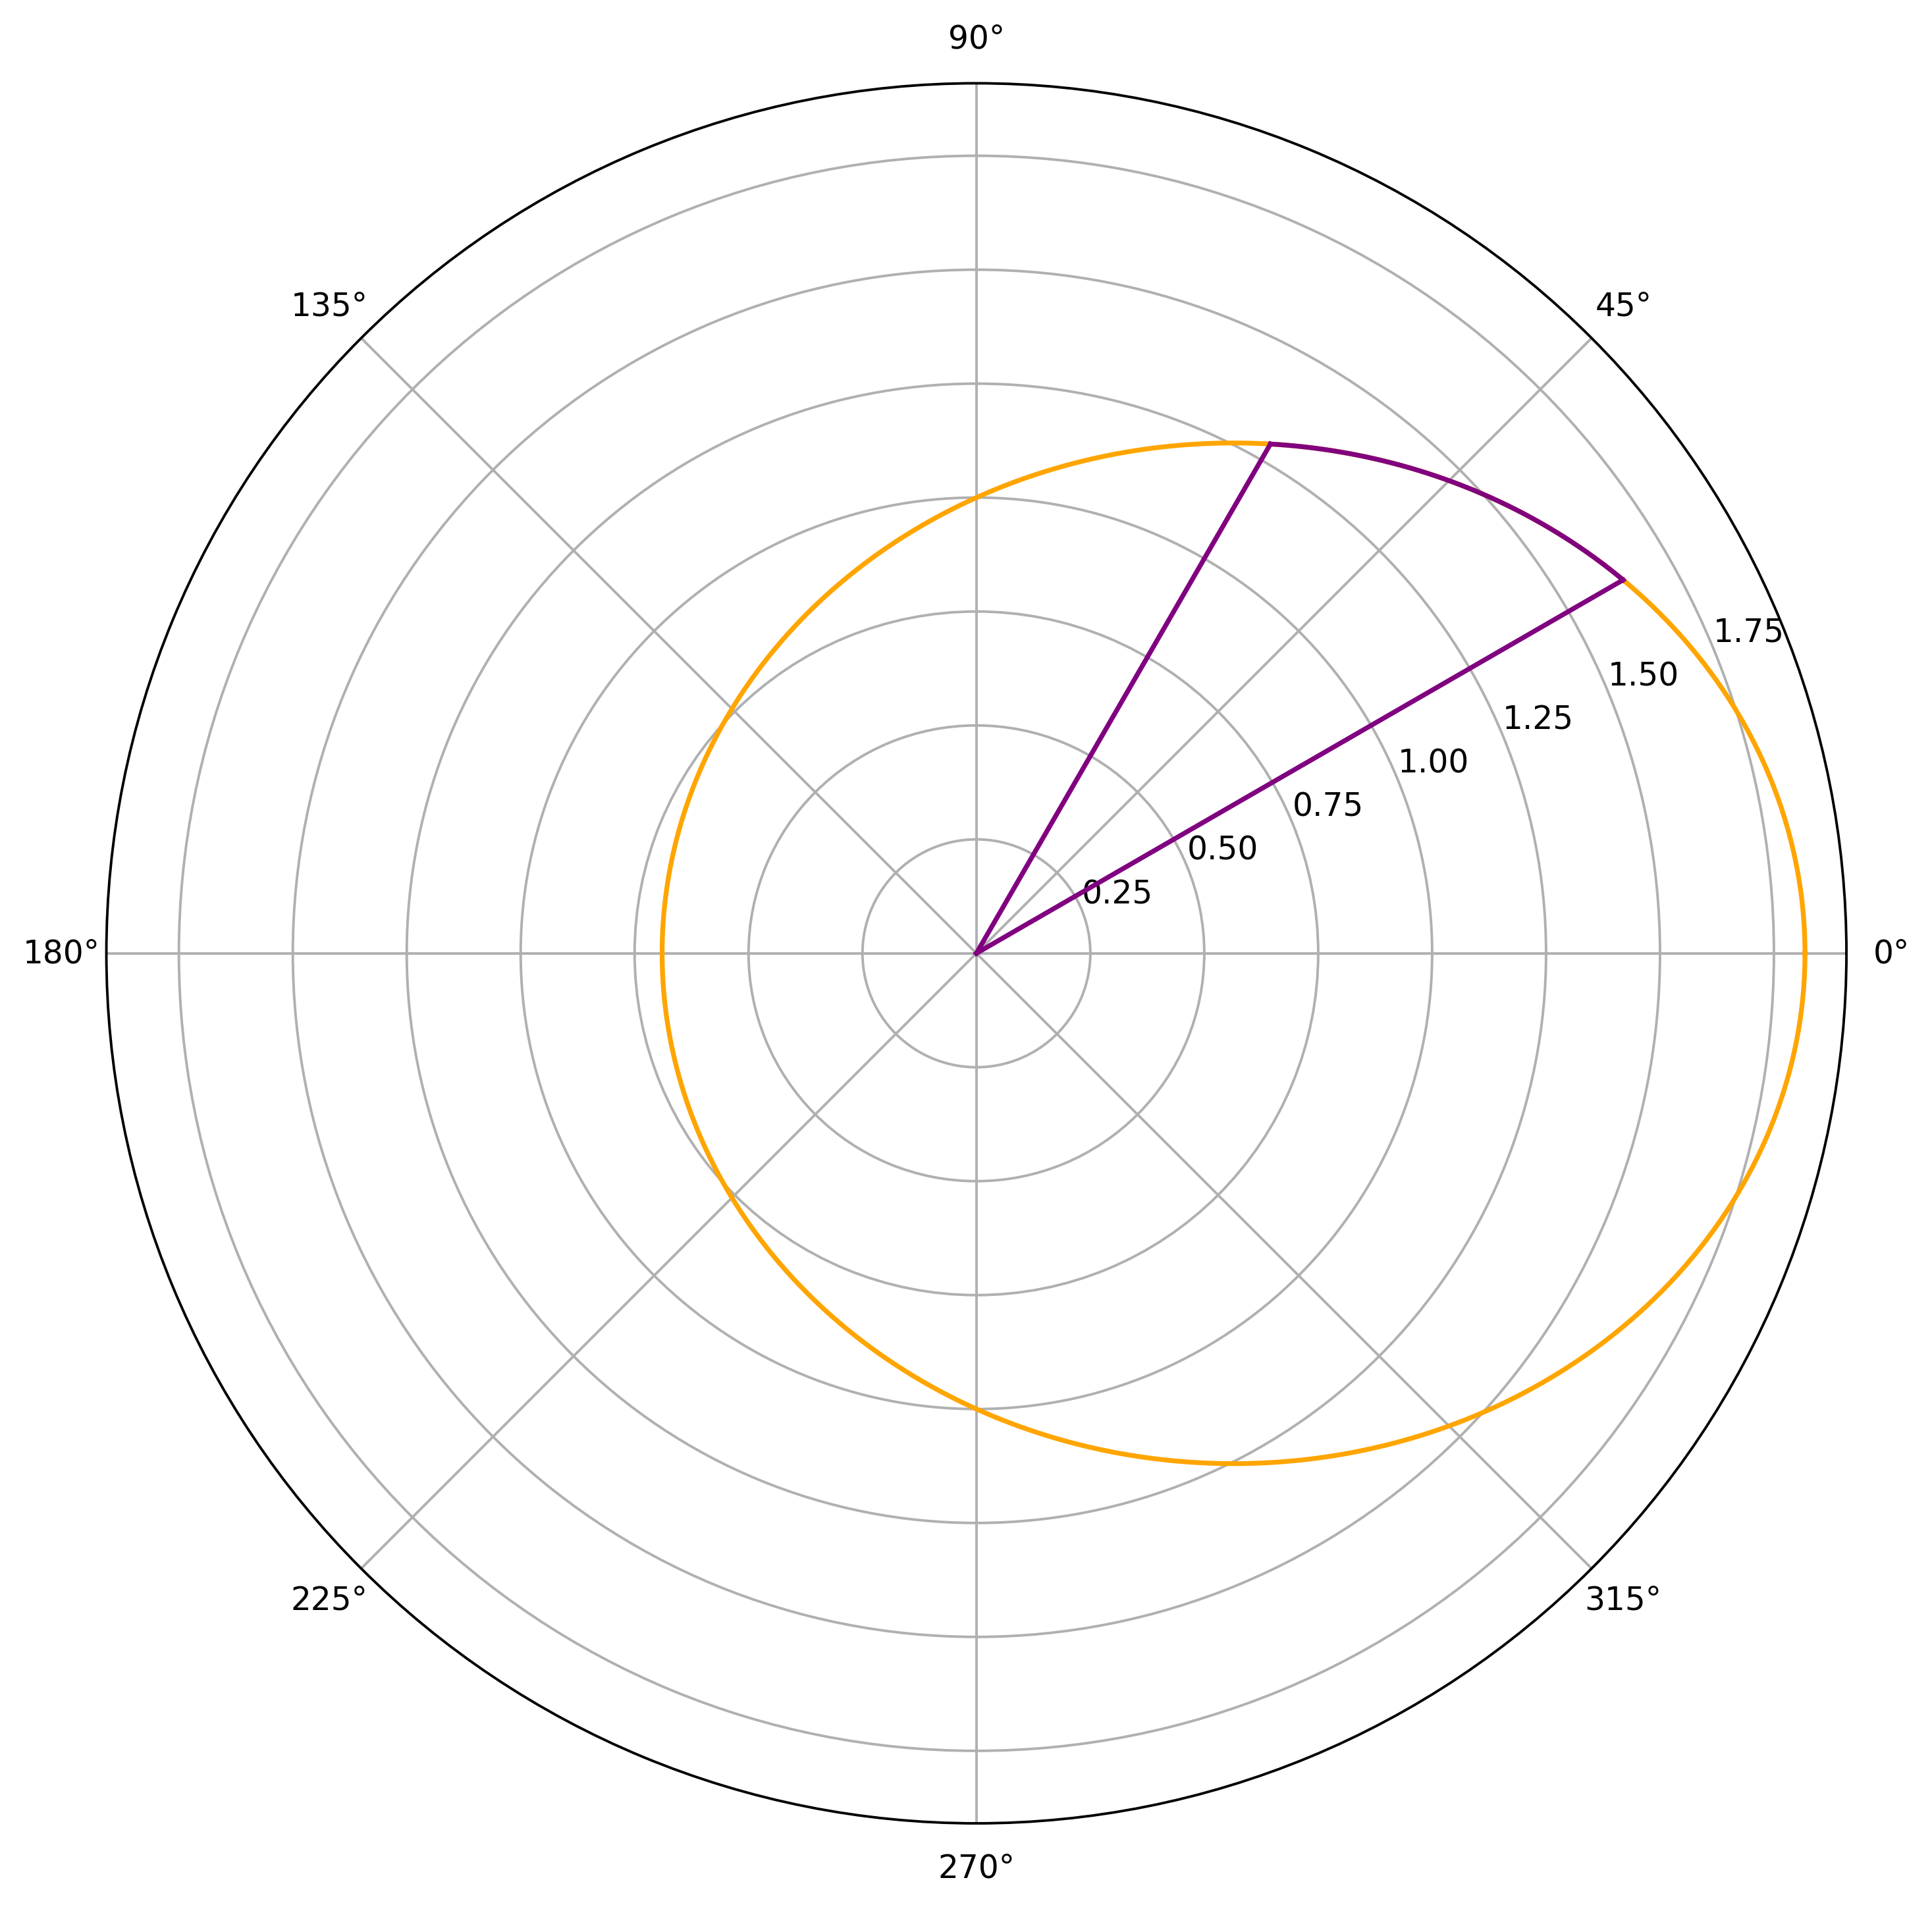

In [72]:
lp,T,R = arcLnPolar(f,np.pi/6,np.pi/3)

theta = np.linspace(0,2*np.pi,1000)
r = f(theta)
l1 = np.pi/6
l2 = np.pi/3
rl1 = np.linspace(0,1/(1-0.45*np.cos(l1)),100)
rl2 = np.linspace(0,1/(1-0.45*np.cos(l2)),100)
tl1 = np.array([l1 for i in range(len(rl1))])
tl2 = np.array([l2 for i in range(len(rl2))])
plt.figure(figsize=(10,10),dpi=350)
plt.polar(theta,r,'orange')
plt.polar(T,R,'purple')
plt.polar(tl1,rl1,'purple')
plt.polar(tl2,rl2,'purple')
plt.polar()
print(lp)

In [73]:
def circle(theta):
    r = np.array([1 for i in theta])
    return r

0.7853981431469077


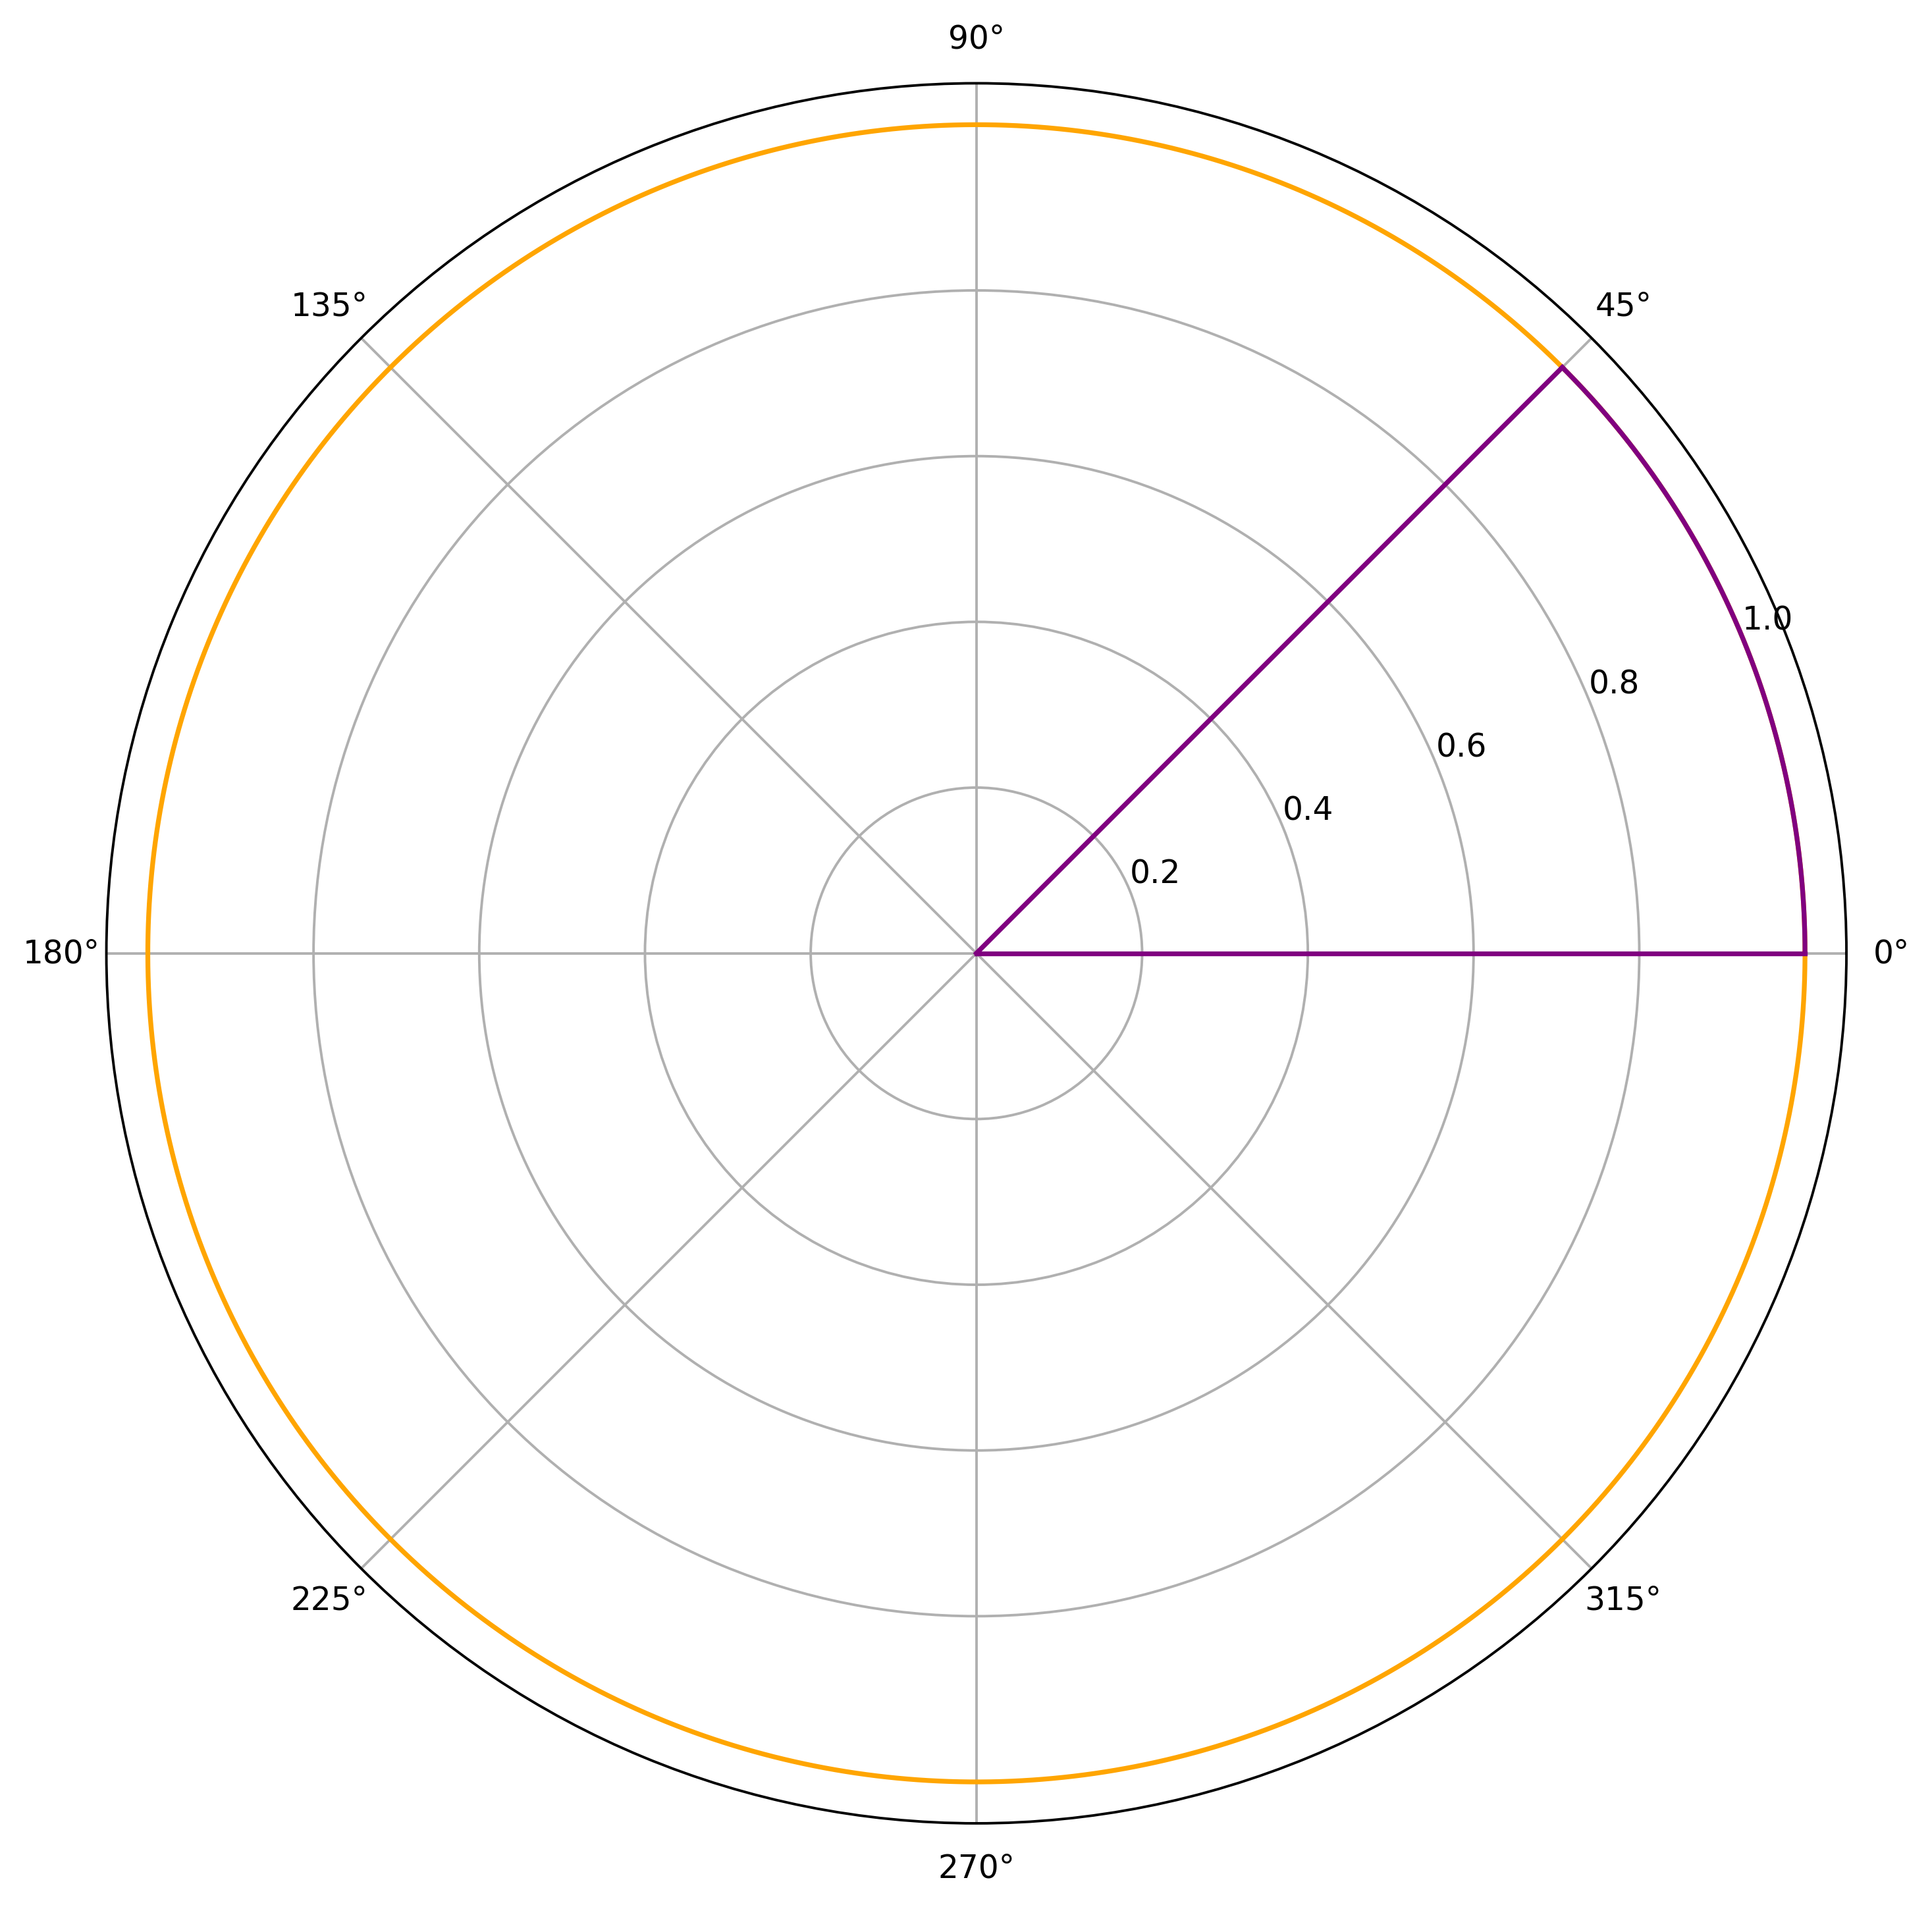

In [74]:
l1 = 0
l2 = np.pi/4

lpC,TC,RC = arcLnPolar(circle,l1,l2)

theta = np.linspace(0,2*np.pi,1000)
r = circle(theta)
rl1 = np.linspace(0,1,100)
rl2 = np.linspace(0,1,100)
tl1 = np.array([l1 for i in range(100)])
tl2 = np.array([l2 for i in range(100)])
plt.figure(figsize=(10,10),dpi=350)
plt.polar(theta,r,'orange')
plt.polar(TC,RC,'purple')
plt.polar(tl1,rl1,'purple')
plt.polar(tl2,rl2,'purple')
plt.polar()

print(lpC)

In [75]:
print(np.pi/4)

0.7853981633974483


In [76]:
def polar_parabola(theta):
    return 1/(1+np.cos(theta))

2.814


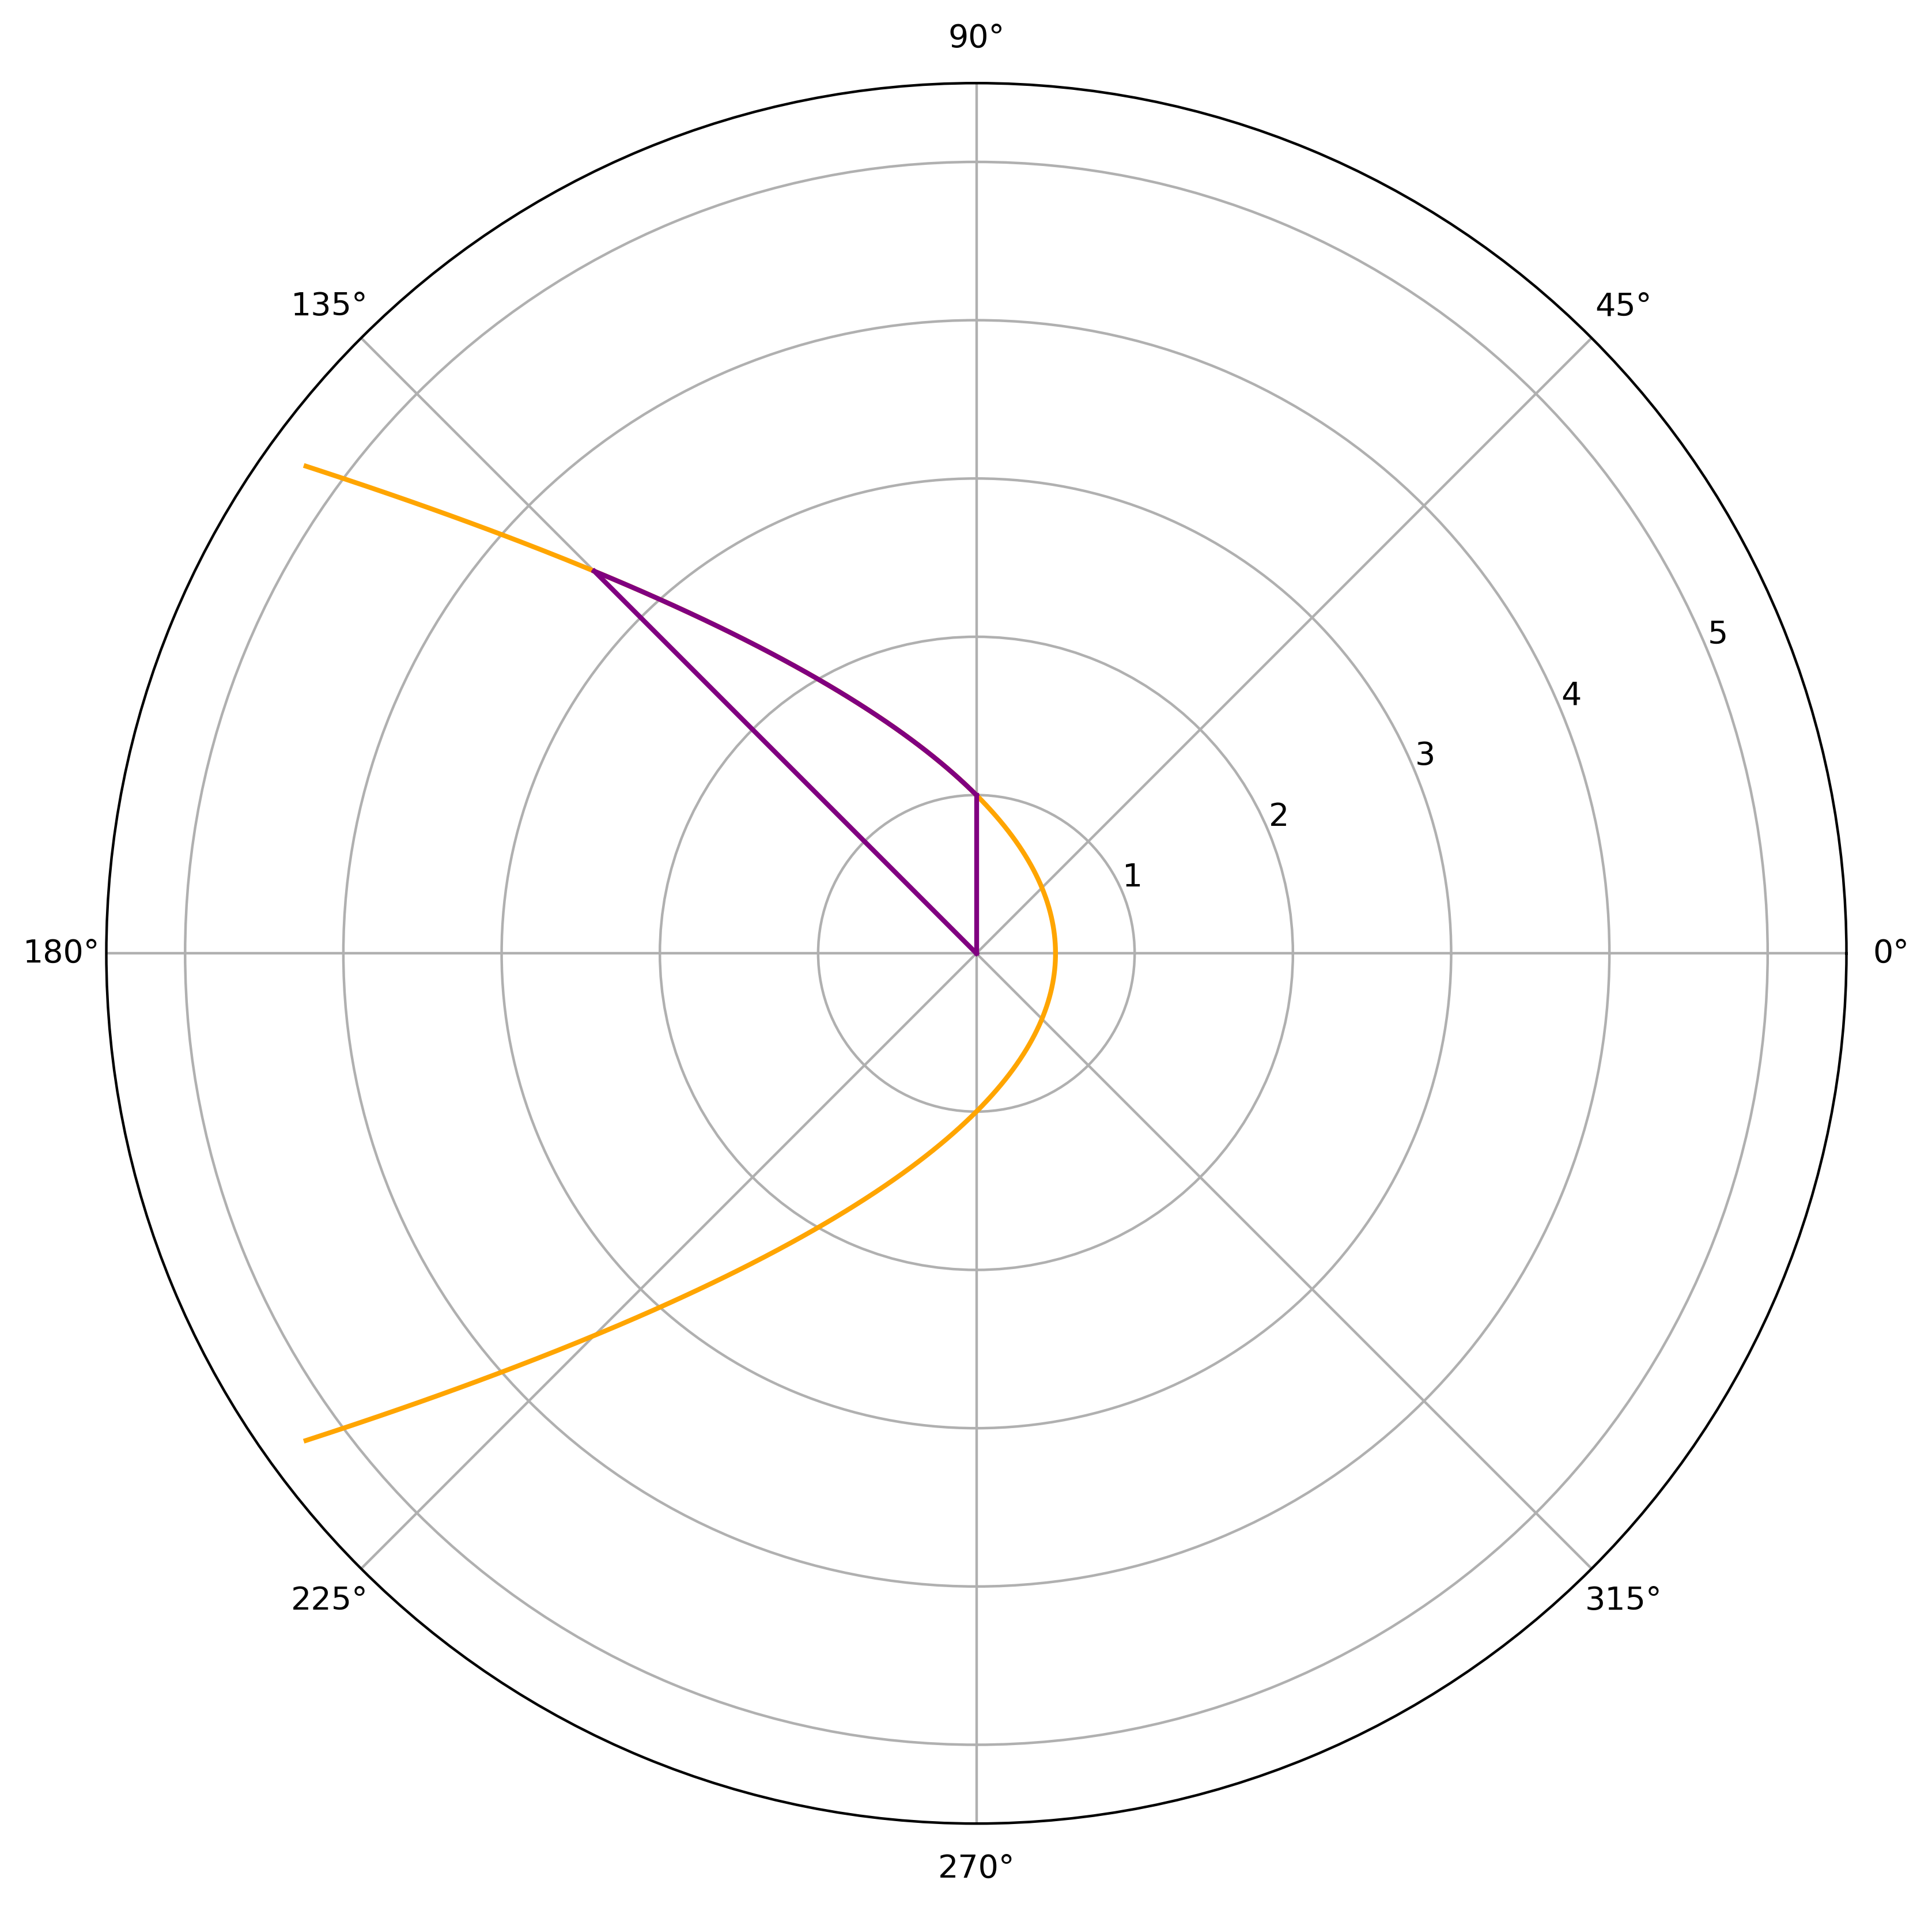

In [77]:
lp1 = np.pi/2
lp2 = 3*np.pi/4

lpa,Tp,Rp = arcLnPolar(polar_parabola,lp1,lp2)

thP = np.linspace(-4*np.pi/5,4*np.pi/5,1000)
rP = polar_parabola(thP)
plt.figure(figsize=(10,10),dpi = 400)

rl1 = np.linspace(0,polar_parabola(lp1),100)
rl2 = np.linspace(0,polar_parabola(lp2),100)
tl1 = np.array([lp1 for i in range(100)])
tl2 = np.array([lp2 for i in range(100)])

plt.polar(thP,rP,'orange')
plt.polar(Tp,Rp,'purple')
plt.polar(tl1,rl1,'purple')
plt.polar(tl2,rl2,'purple')

print(round(lpa,3))

In [78]:
def p(x):
    return np.sqrt(x*x+1)

In [79]:
round(integrate(1,1+np.sqrt(2),p,1/P),3)

2.814